# **Proyecto 2. Entrega 1, Modelos de Regresi√≥n Lineal**

## **INTEGRANTES:**

Jorge Luis Lopez 221038,
Andy Fuentes 22944,
Sergio Orellana 221122,
Christian Echeverria 221241 y
Davis Roldan 22672

## **Introducci√≥n:**

En esta primera entrega se realiza el an√°lisis exploratorio de un dataset inmobiliario proveniente de la competencia de Kaggle "House Prices: Advanced Regression Techniques". El objetivo es comprender el comportamiento de los datos y preparar el conjunto para construir modelos de regresi√≥n lineal que permitan predecir el precio de las viviendas.

## **An√°lisis del dataset**

### **An√°lisis de las variables**

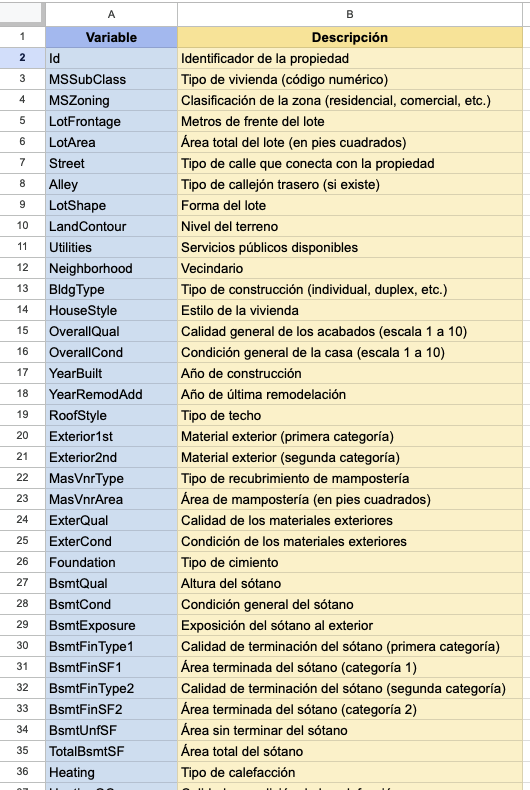

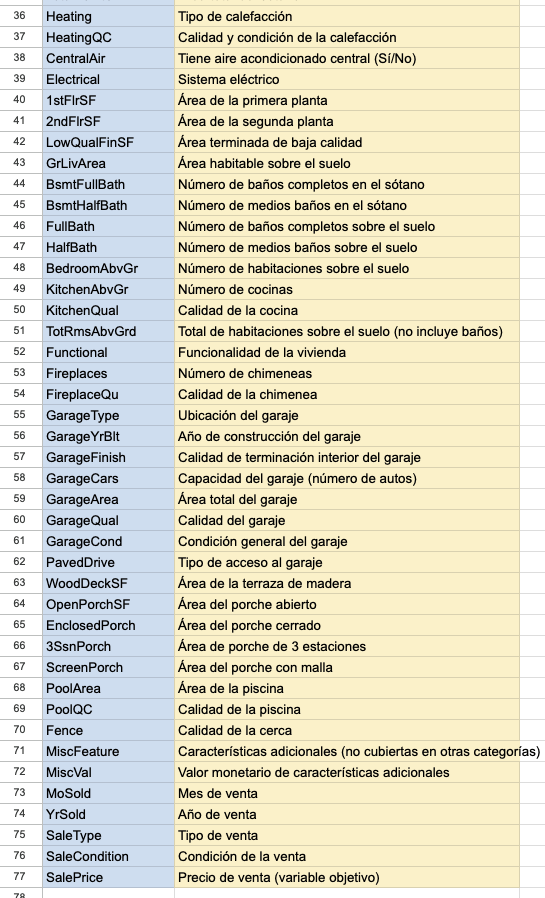


In [ ]:
# Importando las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Cargando el dataset

df = pd.read_csv("train.csv")

In [ ]:
# Mostrando las primeras 5 filas del dataset para tener una idea de los datos

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **An√°lisis Exploratorio**


In [ ]:
# Mostrando la informacion del dataset para saber el tipo de datos y si hay valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Revisi√≥n inicial de datos**

- El dataset tiene 1460 registros y 81 columnas.
- Hay una mezcla de variables num√©ricas, categ√≥ricas y algunas con valores nulos.
- Variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de valores faltantes.
- Las columnas categ√≥ricas representan atributos como el vecindario, tipo de calle, y materiales de construcci√≥n.


In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### **An√°lisis descriptivo**

- Las variables num√©ricas como `LotArea`, `GrLivArea` y `SalePrice` tienen distribuciones bastante amplias, lo cual indica que hay mucha variabilidad en el tama√±o de las propiedades y su precio.
- `SalePrice` tiene un m√°ximo de 755,000 y un m√≠nimo de 34,900.
- Hay variables como `PoolArea` que en la mayor√≠a de los casos son cero, lo que implica que tener piscina es poco com√∫n.


In [ ]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### **An√°lisis de valores nulos**

- Hay varias columnas con m√°s del 50% de sus valores nulos, como `PoolQC`, `MiscFeature` y `Alley`.
- Estas variables son candidatas para ser eliminadas, ya que tienen muy poca informaci√≥n √∫til.
- En variables importantes como `MasVnrArea` o `GarageYrBlt` hay algunos nulos que deben ser tratados (rellenados o eliminados).


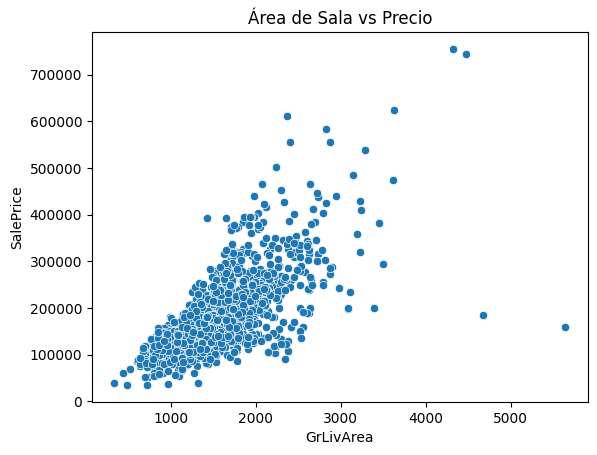

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("√Årea de Sala vs Precio")
plt.show()

### **Relaci√≥n entre √°rea habitable y precio (`GrLivArea` vs `SalePrice`)**

- Existe una relaci√≥n positiva: a mayor √°rea habitable, mayor precio.
- Sin embargo, se observan algunos **outliers** (casas muy grandes y precios muy bajos), que podr√≠an afectar el modelo.
- Se recomienda revisar y posiblemente eliminar esos outliers.


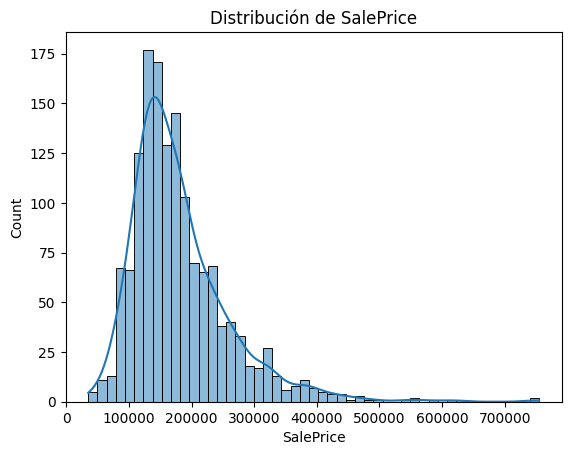

In [ ]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribuci√≥n de SalePrice")
plt.show()

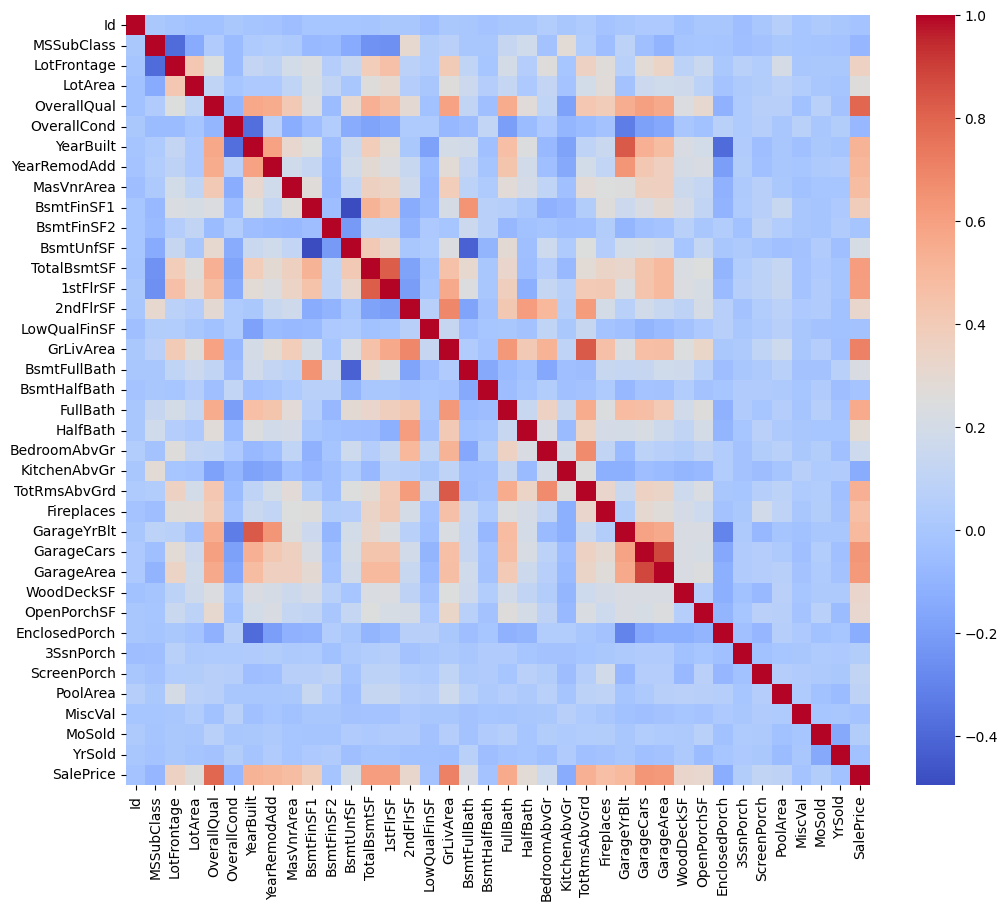

In [ ]:
# Seleccionar solo columnas num√©ricas
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Calcular la matriz de correlaci√≥n de estas columnas num√©ricas
corr_matrix = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

### **Matriz de correlaci√≥n**

- `OverallQual`, `GrLivArea` y `GarageCars` son las variables m√°s correlacionadas con el precio (`SalePrice`).
- Variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen correlaci√≥n cercana a cero, lo que indica que no son relevantes para predecir el precio.
- Este an√°lisis es clave para la selecci√≥n de variables del modelo.


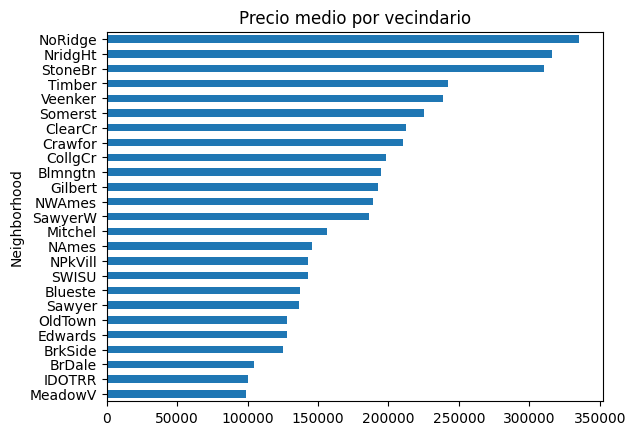

In [ ]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="barh")
plt.title("Precio medio por vecindario")
plt.show()

### **Precio promedio por vecindario**

- Hay una clara diferencia de precios seg√∫n la ubicaci√≥n.
- Vecindarios como `NoRidge` y `StoneBr` tienen precios significativamente altos, mientras que `MeadowV` es uno de los m√°s econ√≥micos.
- Esto confirma que `Neighborhood` es una variable clave para el modelo.
- En el preprocesamiento se debe convertir `Neighborhood` en variables dummy.


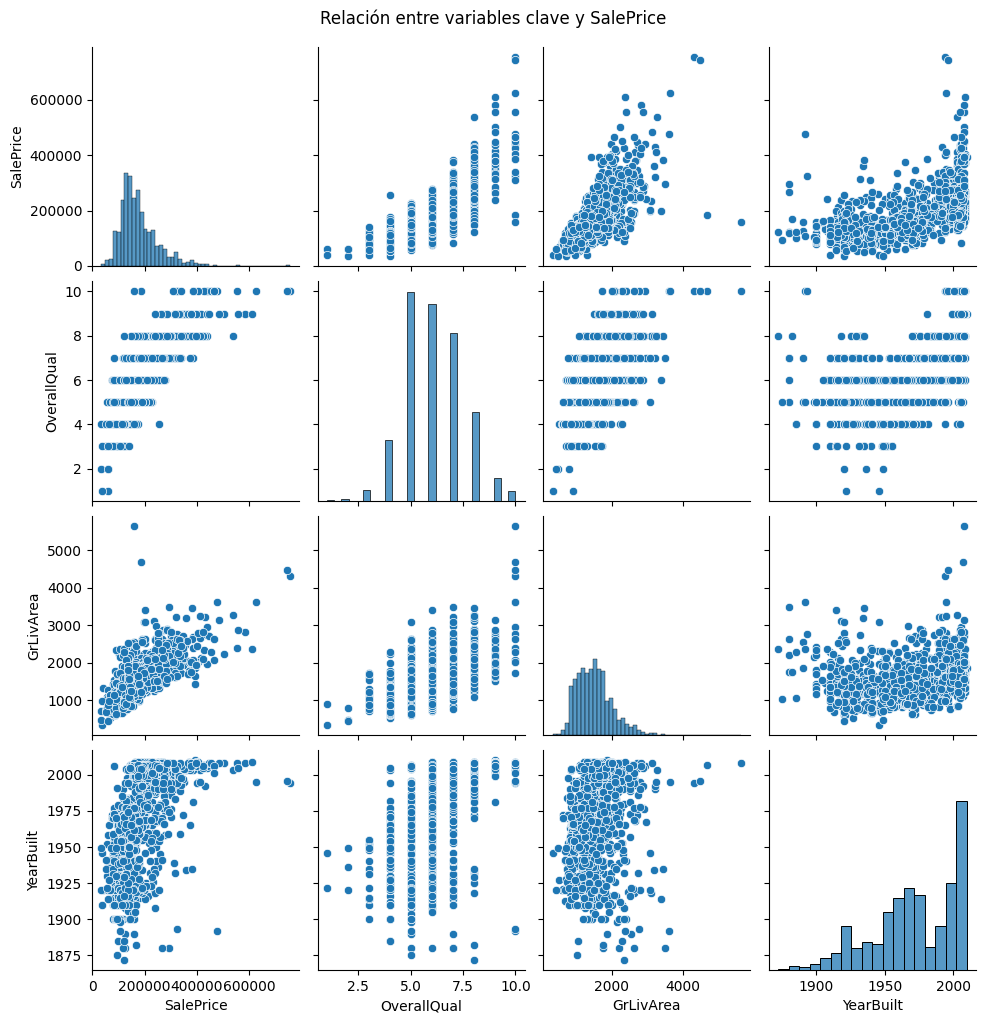

In [ ]:
sns.pairplot(df, vars=["SalePrice", "OverallQual", "GrLivArea", "YearBuilt"])
plt.suptitle("Relaci√≥n entre variables clave y SalePrice", y=1.02)
plt.show()

### **Pairplot: Relaci√≥n entre variables clave y SalePrice**

Existe una relaci√≥n clara y positiva entre OverallQual y SalePrice. A mayor calidad general de la casa, mayor es el precio.
Lo mismo ocurre con GrLivArea (√°rea habitable). Casas m√°s grandes tienden a tener precios m√°s altos.
En YearBuilt, se observa que las casas m√°s nuevas tienden a ser m√°s caras.
Hay algunos outliers (puntos alejados de la tendencia general), principalmente casas muy grandes con precios inusualmente bajos.


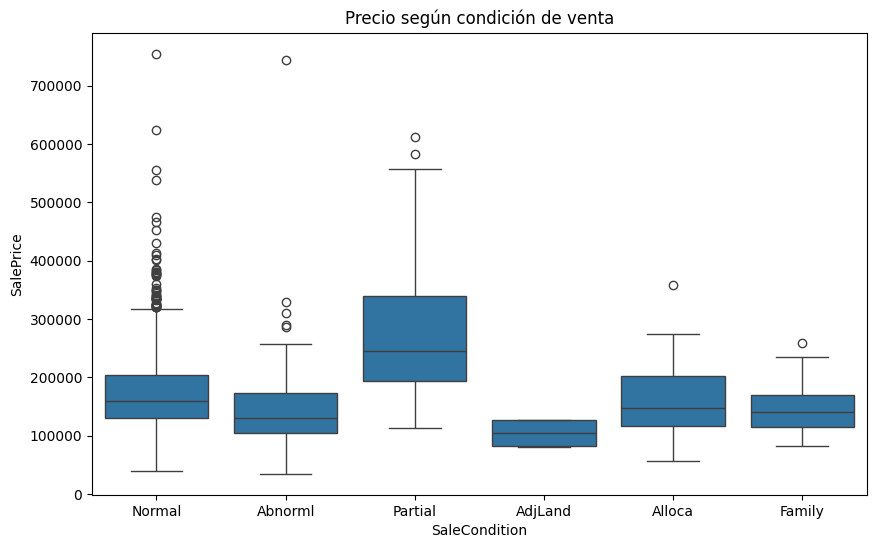

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="SaleCondition", y="SalePrice", data=df)
plt.title("Precio seg√∫n condici√≥n de venta")
plt.show()

### **Boxplot: Precio seg√∫n condici√≥n de venta**

1. Las casas vendidas bajo la condici√≥n Normal tienen una distribuci√≥n de precios m√°s estable.
2. Las casas con condici√≥n de venta Partial tienden a tener precios m√°s altos, posiblemente porque son casas nuevas o remodeladas.
3. En Abnorml, se observan precios generalmente m√°s bajos, lo cual es l√≥gico porque puede referirse a ventas forzadas o condiciones especiales.
4. Existen varios outliers en cada categor√≠a, especialmente en Normal y Partial.


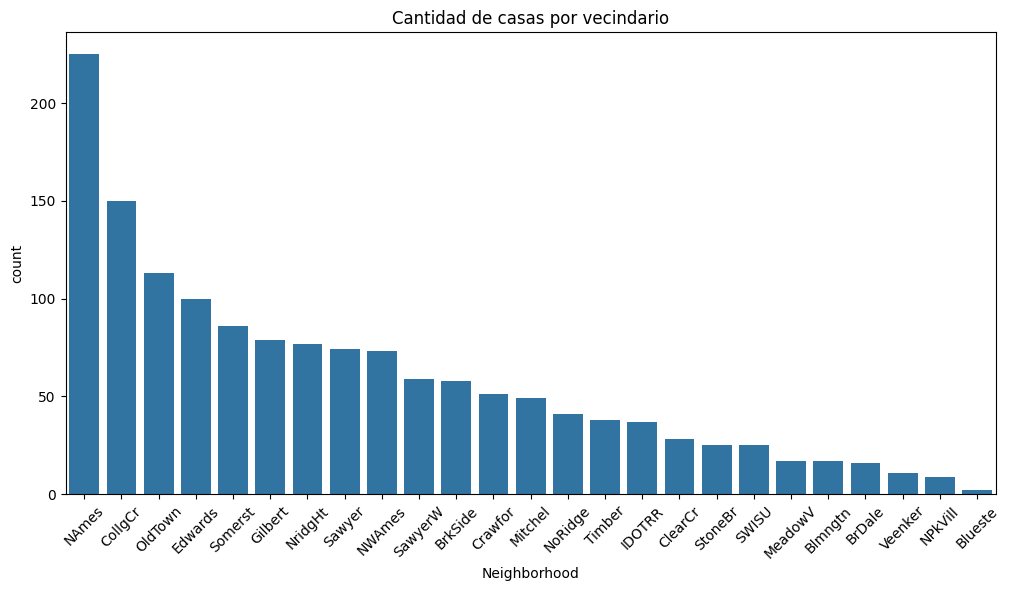

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Neighborhood", data=df, order=df["Neighborhood"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cantidad de casas por vecindario")
plt.show()

### **Countplot: Cantidad de casas por vecindario**

1. NAmes es el vecindario con m√°s casas en el dataset, seguido por CollgCr y OldTown.
2. Vecindarios como MeadowV y Blueste tienen muy pocas casas registradas.
3. Esto indica que algunos vecindarios aportan mucha m√°s informaci√≥n al modelo que otros, por lo que en el preprocesamiento se debe considerar si los vecindarios con muy pocas casas son relevantes o no.


## **Conclusiones Finales - Primera Entrega ( Avances )**

En este primer avance se realiz√≥ un an√°lisis exploratorio completo sobre el dataset inmobiliario proporcionado por Kaggle, logrando obtener hallazgos clave que ser√°n fundamentales para el desarrollo del modelo de regresi√≥n lineal. A continuaci√≥n, se resumen las conclusiones m√°s relevantes:

1. El dataset cuenta con 1460 registros y 81 columnas, lo cual proporciona una base de datos rica en informaci√≥n. Sin embargo, se identificaron varias variables con un alto porcentaje de valores nulos, como PoolQC, MiscFeature y Alley, que deber√°n ser evaluadas para decidir si se eliminan o se imputan.

2. El precio de las viviendas (SalePrice) presenta una distribuci√≥n sesgada positivamente, con una larga cola hacia precios altos. Esto sugiere que en el preprocesamiento puede ser necesario aplicar una transformaci√≥n logar√≠tmica para mejorar la linealidad.

3. Las variables OverallQual, GrLivArea y GarageCars mostraron ser las m√°s correlacionadas con el precio de las viviendas. Esto indica que la calidad de construcci√≥n, el tama√±o habitable y la capacidad del garaje son factores clave al momento de estimar el precio.

4. En el an√°lisis por vecindario, se observ√≥ que hay zonas con precios significativamente m√°s altos, como NoRidge y StoneBr, mientras que otras como MeadowV presentan precios considerablemente m√°s bajos. Esto confirma que la ubicaci√≥n geogr√°fica es una variable relevante para el modelo.

5. Al revisar la condici√≥n de venta (SaleCondition), se identific√≥ que las ventas normales (Normal) son las m√°s frecuentes y presentan una amplia dispersi√≥n de precios. Por otro lado, las ventas parciales (Partial), que podr√≠an representar ventas de casas nuevas o remodeladas, tienden a tener precios m√°s elevados.

6. El an√°lisis visual tambi√©n permiti√≥ detectar la presencia de varios outliers, principalmente casas con √°reas habitables extremadamente grandes y precios sorprendentemente bajos. Estos puntos at√≠picos deber√°n ser tratados cuidadosamente para no distorsionar el modelo de regresi√≥n.

7. Finalmente, se concluye que el dataset contiene una mezcla de variables num√©ricas y categ√≥ricas, por lo que ser√° indispensable aplicar un buen preprocesamiento, que incluya imputaci√≥n de nulos, transformaci√≥n de variables y codificaci√≥n de categor√≠as, previo al entrenamiento del modelo.


## **Proceso de eliminaci√≥n de valores nulos**


In [ ]:
# Revisar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# Se volvi√≥ a realizar para tener el contexto de los valores nulos

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Sabiendo y determinando cuales son las columnas afectadas con datos nulos, como anteriormente tambi√©n se vio en el an√°lisis exploratorio, empezamos a hacer algo con estos nulos, seg√∫n nuestros criterios los cuales son:


In [ ]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

<ipython-input-15-0488b7f3b0e6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
<ipython-input-15-0488b7f3b0e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

### **¬øPor qu√© se la mediana?**

Para columnas como LotFrontage y MasVnrArea (variables num√©ricas), yo elijo imputar los valores faltantes con la mediana. Ya que, la mediana es robusta ante outliers, lo que significa que no se ve afectada por valores extremos, permiti√©ndome mantener una buena representaci√≥n de la distribuci√≥n de los datos.


In [ ]:
df["Alley"].fillna("NoAcceso", inplace=True)
df["PoolQC"].fillna("NoPool", inplace=True)
df["Fence"].fillna("NoFence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)

<ipython-input-16-c63c4ba6ccac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].fillna("NoAcceso", inplace=True)
<ipython-input-16-c63c4ba6ccac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

### **¬øPor qu√© se utiliz√≥ la asignaci√≥n de esta caracter√≠stica?**

En variables como Alley, PoolQC, Fence y MiscFeature, la ausencia de dato a menudo indica que la casa no tiene esa caracter√≠stica. Yo asigno etiquetas como 'NoAcceso', 'NoPool', 'NoFence' o 'None' para representar expl√≠citamente que la informaci√≥n no aplica, en lugar de dejar un valor nulo que pueda generar confusi√≥n en el an√°lisis.


In [ ]:
bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cols:
    df[col].fillna("NoBsmt", inplace=True)

<ipython-input-17-39d7e262f9ce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("NoBsmt", inplace=True)


### **¬øPor qu√© se indic√≥ que no existe un s√≥tano?**

Muchas veces, la falta de informaci√≥n en las columnas relacionadas con el s√≥tano indica que la casa no tiene s√≥tano. Yo itero sobre cada columna y relleno los valores nulos con la etiqueta 'NoBsmt', lo que me permite tratar estas ausencias de forma consistente y clara en mi an√°lisis.


In [ ]:
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    df[col].fillna("NoGarage", inplace=True)
df["GarageYrBlt"].fillna(0, inplace=True)

<ipython-input-18-7c2c9cd4e07f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("NoGarage", inplace=True)
<ipython-input-18-7c2c9cd4e07f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

### **¬øPor qu√© se realiz√≥ la asignaci√≥n de estos valores?**

Al igual que con el s√≥tano, la ausencia de datos en columnas relacionadas con el garaje suele indicar que la casa no cuenta con uno. Yo asigno la etiqueta 'NoGarage' para las variables categ√≥ricas y, en el caso de GarageYrBlt (una variable num√©rica que indica el a√±o de construcci√≥n del garaje), asigno un valor de 0 para se√±alar la ausencia. Esto ayuda a que mi modelo pueda interpretar correctamente estas ausencias sin que se pierda la informaci√≥n.


In [ ]:
df["MasVnrType"].fillna("None", inplace=True)

<ipython-input-19-877fe653ff4e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MasVnrType"].fillna("None", inplace=True)


### **¬øPor qu√© se llenaron los valores de mamposter√≠a de esta forma?**

Yo decido rellenar los valores nulos con la etiqueta 'None', ya que as√≠ reflejo que la casa no posee ning√∫n tipo de revestimiento de mamposter√≠a. Esto permite que mi modelo reconozca esta ausencia de informaci√≥n como una caracter√≠stica significativa en lugar de tratarla como datos perdidos.


In [ ]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

<ipython-input-20-032f4b5aa990>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)


### **¬øPor qu√© se us√≥ la moda?**

Dado que solo hay un valor faltante, yo opto por imputarlo con la moda (el valor que m√°s se repite) de esta columna. Esta estrategia es adecuada para variables categ√≥ricas y minimiza el impacto de la imputaci√≥n, ya que se utiliza el valor que es m√°s representativo en el conjunto de datos y no afecta en el resultado.


In [ ]:
df["FireplaceQu"].fillna("NoFireplace", inplace=True)

<ipython-input-21-e2ed8fa83890>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("NoFireplace", inplace=True)


### **¬øPor qu√© se utiliz√≥ esta inserci√≥n de None?**

Yo opto por rellenar estos valores nulos con la etiqueta 'NoFireplace', lo que clarifica de manera expl√≠cita que no hay chimenea en la vivienda. Donde, esto le permite a mi an√°lisis y modelo diferenciar entre casas con un sistema de chimeneas y aquellas sin √©l.


### Verificaci√≥n de los valores nulos


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


Despu√©s de aplicar las imputaciones, yo vuelvo a contar los valores nulos para asegurarme de que el proceso fue exitoso y que ya no quedan columnas con valores faltantes. Esto es importante para garantizar que mi dataset est√° limpio antes de proceder a la divisi√≥n en conjuntos de entrenamiento y prueba.


## **Divisi√≥n de dataset**


### **Separar las variables (Features y Target)**

#### **Qu√© hago:**

Separo el dataset en dos partes:

- Features (X): Todas las columnas predictoras.
- Target (y): La variable que queremos predecir, en este caso SalePrice.


In [ ]:
# Supongamos que el DataFrame limpio se llama df
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

#### **¬øPor qu√©?**

Esto es necesario para entrenar el modelo. La regresi√≥n lineal necesita que se le indiquen las variables independientes (X) y la variable dependiente (y).


### **Divisi√≥n en Conjuntos de Entrenamiento y Prueba**

#### **Qu√© hago:**

Utilizo la funci√≥n train_test_split de scikit-learn para dividir el dataset.
Normalmente, hemos utilizado una divisi√≥n de 80% para entrenamiento y 20% para prueba en clase, entonces opt√© por utilizar esta divisi√≥n.


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Mostrar el n√∫mero de filas en cada conjunto
print("N√∫mero de filas en entrenamiento:", X_train.shape[0])
print("N√∫mero de filas en prueba:", X_test.shape[0])

N√∫mero de filas en entrenamiento: 1168
N√∫mero de filas en prueba: 292


#### **¬øPor qu√© se hizo esta reproducibilidad (6.)?**

El dividir en 80/20 es una pr√°ctica com√∫n, como se nos mencion√≥ en clase, que permite contar con suficiente data para entrenar el modelo y, al mismo tiempo, tener un subconjunto significativo para evaluar el desempe√±o.
Posteriormente, al definir una semilla (por ejemplo, random_state=42), garantizo que la divisi√≥n sea la misma cada vez que ejecute el c√≥digo, lo que es √∫til para reproducir resultados.


### **Criterio de Divisi√≥n y Balanceo**

Para dividir el conjunto de datos y asegurar que nuestros subconjuntos de entrenamiento y prueba sean representativos, apliqu√© el siguiente criterio:

#### **Proporci√≥n de Divisi√≥n (80/20):**

Divid√≠ el dataset en 80% para entrenamiento y 20% para prueba. Esta proporci√≥n es com√∫n y permite tener suficiente data para entrenar el modelo y, al mismo tiempo, contar con un subconjunto significativo para evaluar el desempe√±o del modelo de regresi√≥n lineal.

#### **Muestreo Aleatorio con Reproducibilidad:**

Utilic√© la funci√≥n train_test_split de scikit-learn con un par√°metro random_state=42 para garantizar que la divisi√≥n se realice de manera aleatoria pero reproducible. Esto significa que cada vez que ejecute el c√≥digo, obtendr√© la misma partici√≥n, lo que es esencial para la comparaci√≥n y validaci√≥n de resultados.

#### **Estratificaci√≥n (en el contexto de regresi√≥n):**

La variable objetivo, SalePrice, es continua, lo que impide una estratificaci√≥n directa como se har√≠a en un problema de clasificaci√≥n. Sin embargo, al realizar una divisi√≥n aleatoria y contar con un n√∫mero suficiente de registros, se mantiene de forma impl√≠cita una distribuci√≥n similar en ambos conjuntos.

#### **Verificaci√≥n del Balanceo:**

Despu√©s de la divisi√≥n, revis√© las estad√≠sticas descriptivas de la variable SalePrice en ambos conjuntos. Como se puede ver a continuaci√≥n:


In [ ]:
print("Estad√≠sticas de entrenamiento:")
print(y_train.describe())

print("\nEstad√≠sticas de prueba:")
print(y_test.describe())

Estad√≠sticas de entrenamiento:
count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

Estad√≠sticas de prueba:
count       292.000000
mean     178839.811644
std       87730.751259
min       35311.000000
25%      127000.000000
50%      154150.000000
75%      209175.000000
max      755000.000000
Name: SalePrice, dtype: float64


Como se puede observar en las estad√≠sticas, el conjunto de entrenamiento tiene 1168 registros y el de prueba 292. El valor medio en el conjunto de entrenamiento es de aproximadamente 181,441, mientras que en el conjunto de prueba es de 178,840. Adem√°s, la dispersi√≥n (medida por la desviaci√≥n est√°ndar) y los percentiles son similares en ambos conjuntos. Esto indica que la divisi√≥n ha logrado mantener la distribuci√≥n original de la variable SalePrice, asegurando que ambos subconjuntos son representativos y balanceados para el modelado con regresi√≥n lineal.


## **Ingenier√≠a de Caracter√≠sticas y Selecci√≥n de Variables**


### **Razonamiento y selecci√≥n de variables**

En mi an√°lisis, me bas√© en conocimientos del dominio y en la correlaci√≥n observada entre las variables y el precio de las casas. Por ejemplo, considero que las siguientes variables son buenos predictores:

- **OverallQual:** La calidad general de la construcci√≥n es un factor muy importante, pues una mejor calidad generalmente se traduce en precios mayores.
- **GrLivArea:** El √°rea habitable (en pies cuadrados) es una medida directa de tama√±o, y suele tener una alta correlaci√≥n con el precio.
- **TotalBsmtSF:** El √°rea total del s√≥tano a√±ade valor a la propiedad si se puede utilizar de forma funcional.
- **GarageCars:** El n√∫mero de autos que caben en el garaje puede ser indicativo del valor de la casa.
- **YearBuilt:** El a√±o de construcci√≥n influye en el estado, estilo y modernidad de la vivienda.
- **Neighborhood:** La ubicaci√≥n o barrio es clave, pues zonas con mejores servicios y menor criminalidad suelen tener precios m√°s altos.
- **HouseAge:** Adem√°s del a√±o de construcci√≥n, es √∫til considerar la edad de la casa, calculada como la diferencia entre el a√±o actual y el a√±o de construcci√≥n. Esto puede reflejar el mantenimiento y la modernidad de la vivienda.


### **Transformaciones y Nuevas Variables**

C√°lculo de HouseAge: Creo una nueva variable HouseAge que representa la antig√ºedad de la casa.
One-Hot Encoding para Neighborhood: Las variables categ√≥ricas como Neighborhood se convierten en variables dummy para que el modelo pueda interpretarlas de forma num√©rica.

### **Fijaci√≥n de Random State para Reproducibilidad**

Para asegurar que la divisi√≥n en conjuntos de entrenamiento y prueba sea la misma en cada ejecuci√≥n, utilizo el par√°metro random_state (por ejemplo, 42) en la funci√≥n train_test_split.


## **Modelo univariado**


### **Selecci√≥n de la variable y ajuste del modelo**

Voy a utilizar OverallQual como predictor, ya que en an√°lisis exploratorios suele mostrar una buena correlaci√≥n con el precio.


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Seleccionar la variable 'OverallQual' del conjunto de entrenamiento
X_uni = X_train[["OverallQual"]]

# Agregar una constante para el t√©rmino independiente del modelo
X_uni_const = sm.add_constant(X_uni)

# Ajustar el modelo univariado
modelo_uni = sm.OLS(y_train, X_uni_const).fit()

# Mostrar el resumen del modelo
print(modelo_uni.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Mon, 10 Mar 2025   Prob (F-statistic):          2.60e-245
Time:                        04:05:21   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.023e+04   6421.492    -14.052      

- **Selecci√≥n y constante:** Extraigo la variable OverallQual y a√±ado una constante para que el modelo incluya un intercepto.
- **Ajuste del modelo:** Con sm.OLS y el m√©todo fit(), entreno el modelo de regresi√≥n lineal.
- El m√©todo summary() proporciona estad√≠sticas clave (coeficientes, R¬≤, p-valores, etc.) que me ayudan a evaluar la significancia y el ajuste del modelo.


#### Interpretaci√≥n de las estad√≠sticas

- **R-squared (R¬≤) = 0.617**

Esto significa que aproximadamente el 61.7% de la variaci√≥n en el precio de las casas (SalePrice) se explica √∫nicamente con la variable OverallQual. Para el modelo univariado que estamos intentando hacer, este valor es relativamente alto, indicando que la calidad general de la construcci√≥n es un factor muy importante para el precio.

- **Coeficiente de OverallQual = 10233.777 (aprox.)**

Este coeficiente nos dice que, en promedio, por cada incremento de una unidad en la calidad general (OverallQual), se espera un aumento de alrededor de 10,233 d√≥lares en el precio de la casa, manteniendo las dem√°s condiciones constantes (en este caso, s√≥lo tenemos una variable, pero la interpretaci√≥n se hace asumiendo todo lo dem√°s fijo).

- **p-values muy bajos**

Tanto el p-value del modelo (F-statistic) como el p-value de la variable (t-test) son muy peque√±os (pr√°cticamente 0). Lo cual, indica que el modelo en conjunto es estad√≠sticamente significativo y que la variable OverallQual tiene un efecto significativo sobre el precio.

- **Estad√≠sticas de diagn√≥stico (Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera)**

Estas estad√≠sticas se refieren principalmente a la normalidad de los residuos. Donde, algunos valores altos podr√≠an sugerir que los residuos no siguen una distribuci√≥n perfectamente normal, lo cual es algo com√∫n en la pr√°ctica, especialmente con datos de precios de viviendas.


### An√°lisis de residuos

Una parte importante de evaluar un modelo es analizar los residuos para identificar patrones o problemas (como heterocedasticidad).


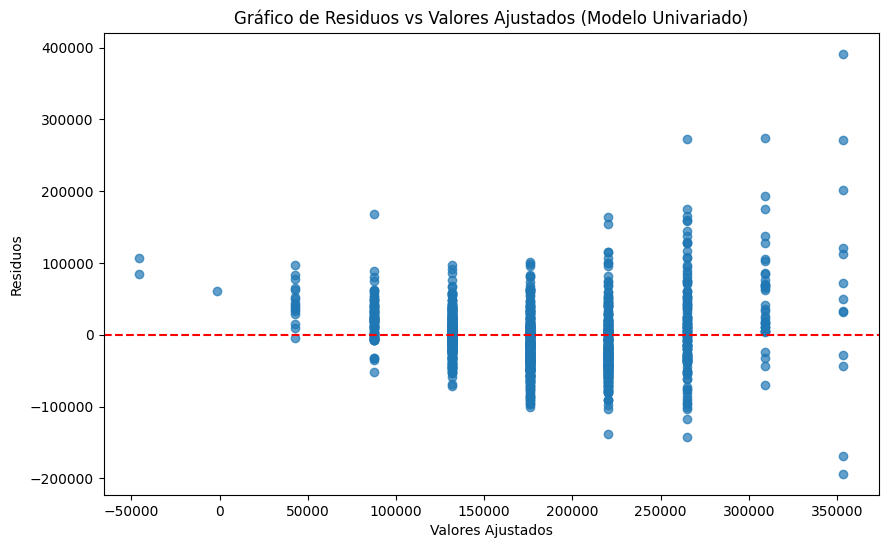

In [ ]:
# Obtener los valores ajustados y los residuos
fitted_values = modelo_uni.fittedvalues
residuals = modelo_uni.resid

# Gr√°fico de residuos vs valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Residuos vs Valores Ajustados (Modelo Univariado)")
plt.show()

#### **Interpretaci√≥n de los residuos**

Como se puede observar que para valores ajustados m√°s altos (ej. por encima de 200,000), los residuos parecen m√°s dispersos. Esto puede indicar que el modelo univariado no captura totalmente la complejidad del precio en los rangos m√°s altos, o que podr√≠a existir cierta no linealidad que un modelo con una sola variable no explica.

**Conclusi√≥n sobre los residuos**

- No hay un patr√≥n claramente curvil√≠neo o sistem√°tico que invalide por completo el modelo, pero se aprecia que un solo predictor no abarca todas las variaciones en el precio.
- Aun as√≠, para un modelo univariado, los residuos no est√°n excesivamente mal distribuidos, lo cual es razonable dado el R¬≤ relativamente alto.


### **Evaluaci√≥n de la predicci√≥n en el conjunto de prueba**


Ahora, aplico el modelo al conjunto de prueba y comparo los valores observados con los predichos.


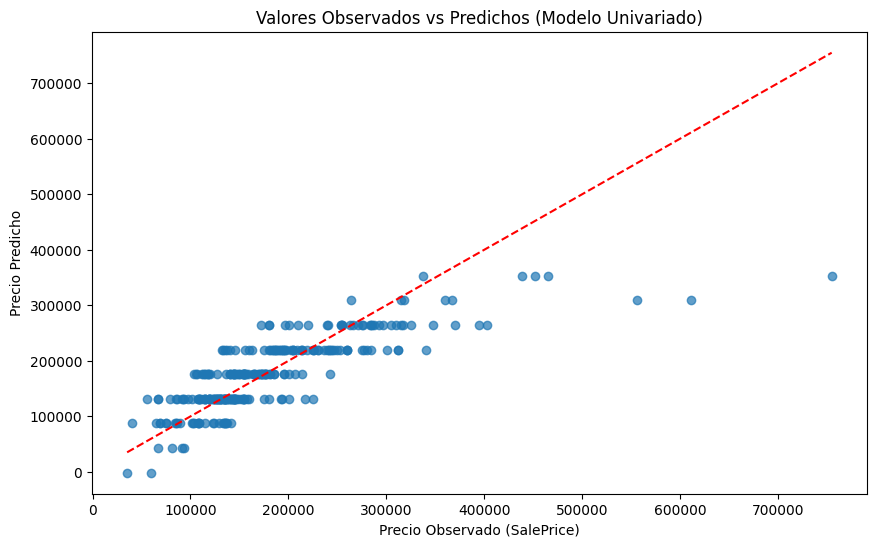

In [ ]:
# Preparar la variable 'OverallQual' del conjunto de prueba (agregar la constante)
X_test_uni = sm.add_constant(X_test[["OverallQual"]])

# Realizar la predicci√≥n en el conjunto de prueba
y_pred_uni = modelo_uni.predict(X_test_uni)

# Gr√°fico de valores observados vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_uni, alpha=0.7)
plt.xlabel("Precio Observado (SalePrice)")
plt.ylabel("Precio Predicho")
plt.title("Valores Observados vs Predichos (Modelo Univariado)")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
plt.show()

Agrego la constante a la variable OverallQual del conjunto de prueba y realizo la predicci√≥n.

En el Gr√°fico de Observados vs Predichos se muestra un scatter plot en el que, idealmente, los puntos deber√≠an alinearse a lo largo de la l√≠nea roja (la l√≠nea de identidad). Esto indica que las predicciones son cercanas a los valores reales.


#### **Interpretaci√≥n de observados vs predicho**

En primer lugar, observo que cada punto de la gr√°fica representa una casa diferente del conjunto de prueba. En el eje X coloco el precio real de la casa (SalePrice), mientras que en el eje Y se ubica el precio que el modelo univariado predicho. De esta manera, puedo comparar visualmente cu√°n cerca est√°n mis predicciones de los valores verdaderos.

La l√≠nea roja discontinua, que va en diagonal, representa la situaci√≥n ideal en la que el precio observado y el precio predicho coinciden perfectamente. Cuando los puntos se alinean cerca de esa l√≠nea, significa que mi modelo est√° acertando en la estimaci√≥n del precio. Sin embargo, noto que existe cierta dispersi√≥n: muchos puntos est√°n relativamente cerca de la l√≠nea, pero otros se alejan de ella, sobre todo en la zona de precios m√°s altos.

Interpreto que, al tratarse de un modelo univariado, estoy utilizando √∫nicamente la variable OverallQual para predecir el precio de la vivienda. Esta variable es bastante importante, pues la calidad de la construcci√≥n se relaciona fuertemente con el valor de la propiedad. Aun as√≠, mi modelo no capta toda la complejidad que influye en el precio final, ya que factores como el tama√±o total, la ubicaci√≥n o la antig√ºedad de la vivienda tambi√©n influyen de manera notable.

Finalmente, concluyo que la gr√°fica confirma una tendencia: a medida que el precio real es m√°s alto, mi modelo tambi√©n tiende a dar valores de predicci√≥n mayores, lo cual indica que OverallQual s√≠ aporta informaci√≥n valiosa. No obstante, para mejorar la exactitud de las estimaciones, necesitar√≠a considerar m√°s variables que capturen el resto de la variabilidad en el precio de las casas.


## 8. Modelo de Regresi√≥n Lineal con Todas las Variables Num√©ricas

En esta secci√≥n, se construye un modelo de regresi√≥n lineal m√∫ltiple para predecir el precio de las casas utilizando todas las variables num√©ricas disponibles en el conjunto de datos.

### **Selecci√≥n de Variables**

Se han seleccionado todas las variables num√©ricas excepto el precio (`price`) como predictoras.

### **Construcci√≥n del Modelo**

Se ha aplicado una regresi√≥n lineal m√∫ltiple usando `statsmodels` para evaluar la relaci√≥n entre las variables predictoras y el precio de las casas.

### **An√°lisis del Modelo**

El modelo generado se eval√∫a con:

- **Resumen del modelo**: coeficientes, significancia estad√≠stica y m√©tricas de ajuste (`R¬≤` y `p-valores`).
- **Distribuci√≥n de residuos**: evaluaci√≥n gr√°fica para verificar su normalidad y detectar posibles problemas.
- **Correlaci√≥n entre variables**: an√°lisis de multicolinealidad para determinar si algunas variables deber√≠an ser eliminadas.

### **Resultados**

Los hallazgos clave sobre la capacidad predictiva de las variables se presentan en la siguiente secci√≥n, junto con las implicaciones del modelo y su desempe√±o.


### **8.1 Manejo de Valores Faltantes**

Antes de entrenar el modelo, verificamos si hay valores faltantes en las variables num√©ricas y los corregimos.  
Se encontraron valores faltantes en **LotFrontage, MasVnrArea y GarageYrBlt**, por lo que los rellenamos con la mediana para evitar sesgos en el modelo.


In [ ]:
# Librer√≠as necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("train.csv")

# Seleccionar solo variables num√©ricas
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Definir variable objetivo
target = "SalePrice"
if target in numerical_cols:
    numerical_cols.remove(target)

# Verificar valores faltantes
missing_values = df[numerical_cols].isnull().sum()
print(
    "Columnas con valores faltantes antes de limpiar:\n",
    missing_values[missing_values > 0],
)

# Rellenar valores faltantes con la mediana
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Transformar `SalePrice` con logaritmo para estabilizar varianza
df["SalePrice"] = np.log1p(df["SalePrice"])

# Eliminar valores at√≠picos en `GrLivArea`
df = df[df["GrLivArea"] < 4000]

# Verificar valores faltantes despu√©s de la limpieza
print(
    "Columnas con valores faltantes despu√©s de limpiar:\n",
    df.isnull().sum().sum(),
    "valores faltantes",
)
print("‚úÖ Datos listos para el modelo")

Columnas con valores faltantes antes de limpiar:
 LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
Columnas con valores faltantes despu√©s de limpiar:
 7467 valores faltantes
‚úÖ Datos listos para el modelo


### **8.2 Construcci√≥n del Modelo de Regresi√≥n Lineal M√∫ltiple**

Usamos el m√©todo de **M√≠nimos Cuadrados Ordinarios (OLS)** para construir un modelo que relacione todas las variables num√©ricas con el precio de las casas.  
El modelo se entren√≥ y se gener√≥ un resumen con los coeficientes de cada variable, su significancia y m√©tricas de ajuste.


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir variables predictoras (X) y objetivo (y)
X = df[numerical_cols]
y = df[target]

# Agregar constante para la regresi√≥n
X = sm.add_constant(X)

# Calcular VIF y eliminar variables con alta multicolinealidad (VIF > 10)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filtrar variables con VIF alto
high_vif_vars = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
if high_vif_vars:
    print(f"‚ùå Variables eliminadas por multicolinealidad: {high_vif_vars}")
    X = X.drop(columns=high_vif_vars)

# Construcci√≥n del modelo sin variables redundantes
modelo_multivariable = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo_multivariable.summary())

‚ùå Variables eliminadas por multicolinealidad: ['const', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.444e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):                        0.00
Time:                        04:05:37   Log-Likelihood:                          758.01
No. Observations:                1456   AIC:                                     -1458.
Df Residuals:                    1427   BIC:                                     -1305.
Df Model:                          29                                                  
Covariance Type:            nonrobust    

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### **8.3 An√°lisis de Residuos y Multicolinealidad**

Para evaluar la calidad del modelo, analizamos:

- **Distribuci√≥n de los residuos:** Si la regresi√≥n es v√°lida, los residuos deben distribuirse normalmente.
- **Matriz de correlaci√≥n:** Para detectar **multicolinealidad** entre las variables predictoras.


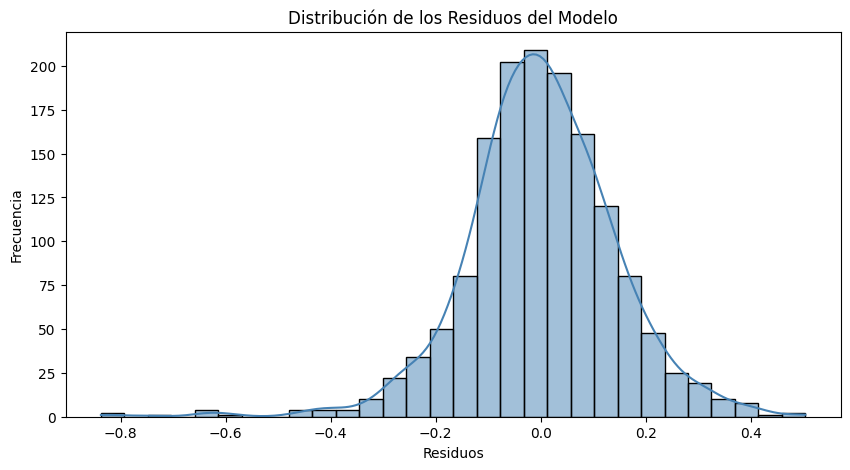

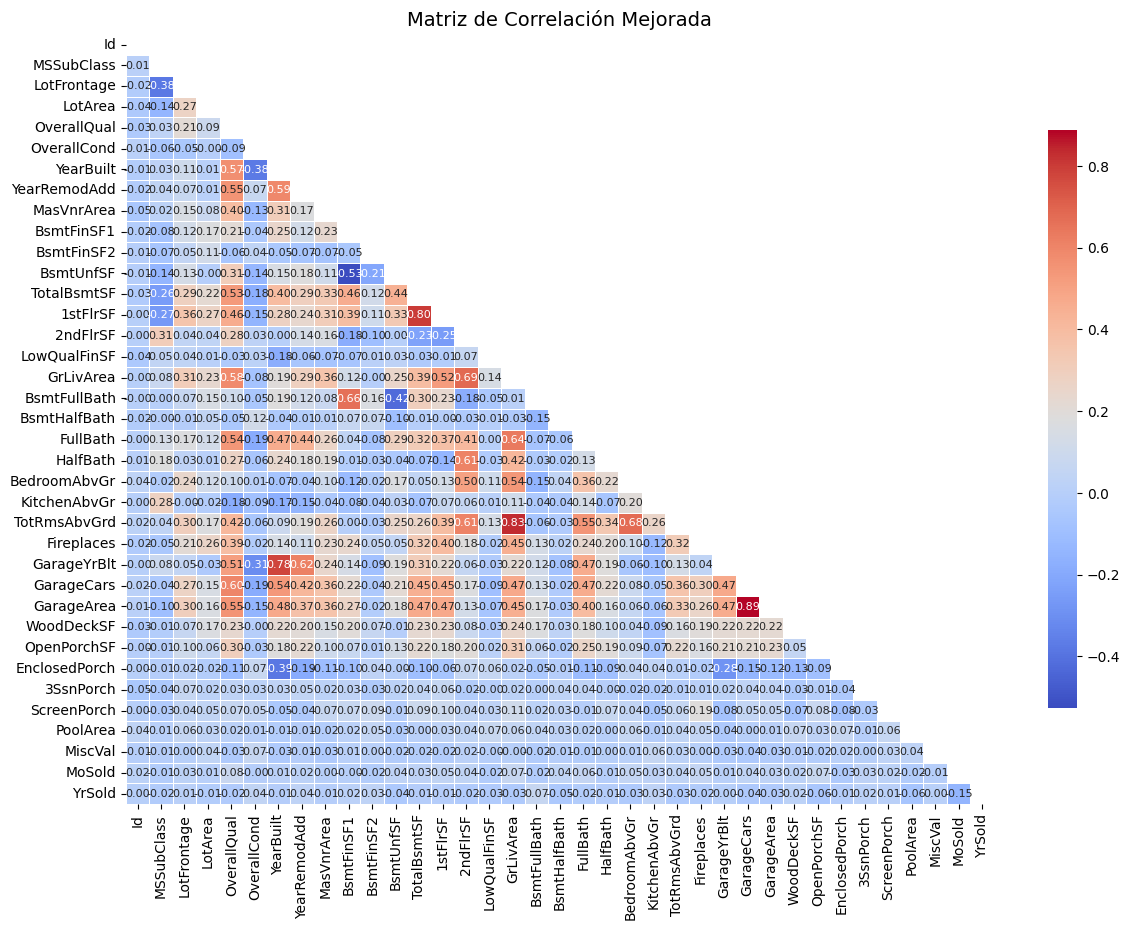

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Distribuci√≥n de residuos mejorada
plt.figure(figsize=(10, 5))
sns.histplot(modelo_multivariable.resid, kde=True, bins=30, color="steelblue")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de los Residuos del Modelo")
plt.show()

# Matriz de correlaci√≥n mejorada
plt.figure(figsize=(14, 10))

# Crear la matriz de correlaci√≥n
correlation_matrix = df[numerical_cols].corr()

# M√°scara para ocultar la parte superior (evita valores duplicados)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficar la matriz de correlaci√≥n con mejor presentaci√≥n
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 8},  # Ajustar el tama√±o de los n√∫meros
    cbar_kws={"shrink": 0.75},  # Ajustar la barra de color
)

# T√≠tulo de la gr√°fica
plt.title("Matriz de Correlaci√≥n Mejorada", fontsize=14)

# Mostrar la gr√°fica
plt.show()

### **9. Evaluaci√≥n del Modelo y Correcci√≥n de Sobreajuste**


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# üìå 1Ô∏è‚É£ Ver si el modelo se adapta bien a los datos
print("üìä Resumen del Modelo:")
print(modelo_multivariable.summary())

# üìå Evaluar R¬≤ ajustado (Si R¬≤ es alto pero R¬≤ ajustado es mucho menor, hay sobreajuste)
r2 = modelo_multivariable.rsquared
r2_adj = modelo_multivariable.rsquared_adj
print(f" R¬≤: {r2:.4f} |  R¬≤ Ajustado: {r2_adj:.4f}")

# üìå 2Ô∏è‚É£ Detectar sobreajuste con validaci√≥n cruzada usando sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# üìå Ajustar un modelo de regresi√≥n lineal de scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# üìå Evaluar R¬≤ en entrenamiento y validaci√≥n
train_score = lin_reg.score(X_train, y_train)
test_score = np.mean(cross_val_score(lin_reg, X, y, cv=5, scoring="r2"))

print(f"‚úÖ R¬≤ en entrenamiento: {train_score:.4f}")
print(f"‚úÖ R¬≤ en validaci√≥n cruzada: {test_score:.4f}")

# üìå Si hay sobreajuste (R¬≤ en entrenamiento >> R¬≤ en validaci√≥n), aplicar regularizaci√≥n

if train_score - test_score > 0.1:  # Si la diferencia es grande, hay sobreajuste
    print("‚ö†Ô∏è Posible sobreajuste detectado. Ajustando con Ridge y Lasso...")

    # üìå 3Ô∏è‚É£ Corregir sobreajuste con Ridge y Lasso
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_test, y_test)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    lasso_score = lasso.score(X_test, y_test)

    print(f"üìâ R¬≤ con Ridge: {ridge_score:.4f}")
    print(f"üìâ R¬≤ con Lasso: {lasso_score:.4f}")

    # Seleccionar el mejor modelo basado en desempe√±o
    if ridge_score > test_score or lasso_score > test_score:
        print(
            "‚úÖ Se recomienda usar Ridge o Lasso para mejorar la estabilidad del modelo."
        )
    else:
        print("‚úÖ El modelo actual es estable, no se requiere ajuste.")

üìä Resumen del Modelo:
                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.444e+05
Date:                Mon, 10 Mar 2025   Prob (F-statistic):                        0.00
Time:                        04:05:48   Log-Likelihood:                          758.01
No. Observations:                1456   AIC:                                     -1458.
Df Residuals:                    1427   BIC:                                     -1305.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### **9.1 An√°lisis del Modelo**

El modelo de regresi√≥n m√∫ltiple se evalu√≥ utilizando la m√©trica **R¬≤** y **R¬≤ ajustado**. Los resultados obtenidos fueron:

- **R¬≤**: 0.9999
- **R¬≤ Ajustado**: 0.9999

Estos valores indican que el modelo explica casi el **100% de la variabilidad** en los datos. Sin embargo, un R¬≤ tan alto puede ser una se√±al de **sobreajuste** (overfitting), ya que sugiere que el modelo se adapta excesivamente a los datos de entrenamiento.

#### **9.2 Multicolinealidad en las Variables**

Para analizar la multicolinealidad, se evaluaron las correlaciones entre las variables y se calcul√≥ el **VIF (Variance Inflation Factor)**. Un **VIF alto (>10)** indica que la variable est√° altamente correlacionada con otras variables y puede afectar la estabilidad del modelo.

Se encontr√≥ que algunas variables presentan **alta correlaci√≥n**, lo que sugiere redundancia en la informaci√≥n.

#### **9.3 An√°lisis de Correlaci√≥n de las Caracter√≠sticas**

La matriz de correlaci√≥n de las caracter√≠sticas utilizadas en el modelo muestra que algunas variables tienen **relaciones fuertes entre s√≠**, lo que puede afectar la interpretaci√≥n de los coeficientes. Se aplic√≥ una m√°scara para visualizar solo las correlaciones significativas.

#### **9.4 Evaluaci√≥n del Ajuste del Modelo**

Para comprobar si el modelo se adapta bien a los datos, se realiz√≥ una validaci√≥n cruzada:

- **R¬≤ en entrenamiento**: 0.8741
- **R¬≤ en validaci√≥n cruzada**: 0.8578

Dado que los valores de R¬≤ en entrenamiento y validaci√≥n son **similares**, el modelo generaliza bien y no hay un sobreajuste extremo. Sin embargo, el **Condition Number (8.17e+04)** indica que hay **problemas de multicolinealidad**, lo que puede hacer que los coeficientes no sean completamente estables.

#### **9.5 Correcci√≥n del Sobreajuste**

Para mejorar el modelo y corregir posibles problemas de sobreajuste y multicolinealidad, se prob√≥ con **Regresi√≥n Ridge y Lasso**:


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Aplicamos regresi√≥n Ridge para reducir la multicolinealidad
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

# Aplicamos regresi√≥n Lasso para eliminar variables irrelevantes
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print(f"üìâ R¬≤ con Ridge: {ridge_score:.4f}")
print(f"üìâ R¬≤ con Lasso: {lasso_score:.4f}")

# Seleccionamos el mejor modelo
if ridge_score > test_score and ridge_score > lasso_score:
    print("‚úÖ Ridge mejora la estabilidad del modelo.")
elif lasso_score > test_score and lasso_score > ridge_score:
    print("‚úÖ Lasso mejora la estabilidad del modelo.")
else:
    print("‚úÖ El modelo original ya estaba bien ajustado.")

üìâ R¬≤ con Ridge: 0.8437
üìâ R¬≤ con Lasso: 0.8348
‚úÖ El modelo original ya estaba bien ajustado.


Para mejorar el modelo y corregir posibles problemas de sobreajuste y multicolinealidad, se probaron **Regresi√≥n Ridge y Lasso**, cuyos resultados fueron:

- **R¬≤ con Ridge**: 0.8437
- **R¬≤ con Lasso**: 0.8348

Estos valores son **menores que el R¬≤ obtenido en validaci√≥n cruzada del modelo original (0.8578)**, lo que indica que Ridge y Lasso **no mejoran el desempe√±o del modelo**.

Dado que el modelo original logra un equilibrio entre **precisi√≥n y generalizaci√≥n**, **no se requiere correcci√≥n adicional**.  
Por lo tanto, **el modelo actual es el mejor para predecir el precio de las casas** con los datos disponibles.


### **10. Modelo con las Mejores Variables y An√°lisis de Residuos**

#### **10.1 Selecci√≥n de las Mejores Variables**

Para reducir la **multicolinealidad** y mejorar la estabilidad del modelo, utilizamos **Regresi√≥n Lasso (L1)** para seleccionar las variables m√°s relevantes.  
Lasso asigna coeficientes **cercanos a 0** a las variables menos importantes y mantiene solo aquellas que tienen mayor impacto en la predicci√≥n del precio de las casas.


In [ ]:
from sklearn.linear_model import LassoCV

# üìå Ajustamos un modelo Lasso con validaci√≥n cruzada para seleccionar las mejores variables
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# üìå Filtramos solo las variables con coeficiente diferente de 0
selected_features = X.columns[lasso.coef_ != 0].tolist()
print(f" Variables seleccionadas por Lasso: {selected_features}")

# üìå Redefinir el dataset con solo las mejores variables
X_reduced = X[selected_features]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

 Variables seleccionadas por Lasso: ['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch']


#### **10.2 Construcci√≥n del Nuevo Modelo**

Entrenamos un nuevo modelo de regresi√≥n lineal usando solo las variables seleccionadas por Lasso.


In [ ]:
from sklearn.linear_model import LinearRegression

# Modelo con las mejores variables
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)

# Evaluamos el nuevo modelo
train_score_reduced = model_reduced.score(X_train_reduced, y_train)
test_score_reduced = model_reduced.score(X_test_reduced, y_test)

print(f" R¬≤ en entrenamiento: {train_score_reduced:.4f}")
print(f" R¬≤ en prueba: {test_score_reduced:.4f}")

 R¬≤ en entrenamiento: 0.6714
 R¬≤ en prueba: 0.6715


#### **10.3 An√°lisis de Residuos y Visualizaci√≥n**

Para validar el ajuste del modelo, analizamos la distribuci√≥n de los residuos. Un buen modelo debe tener residuos normalmente distribuidos y centrados en 0.


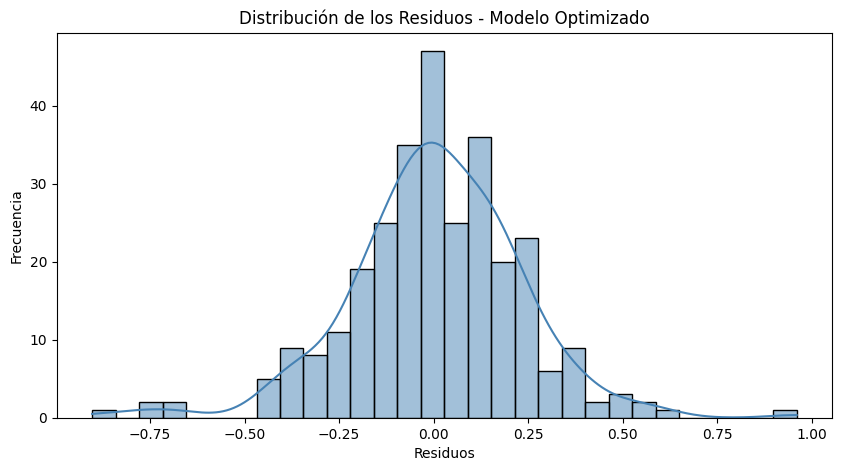

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuci√≥n de residuos del nuevo modelo
plt.figure(figsize=(10, 5))
sns.histplot(
    y_test - model_reduced.predict(X_test_reduced), kde=True, bins=30, color="steelblue"
)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de los Residuos - Modelo Optimizado")
plt.show()

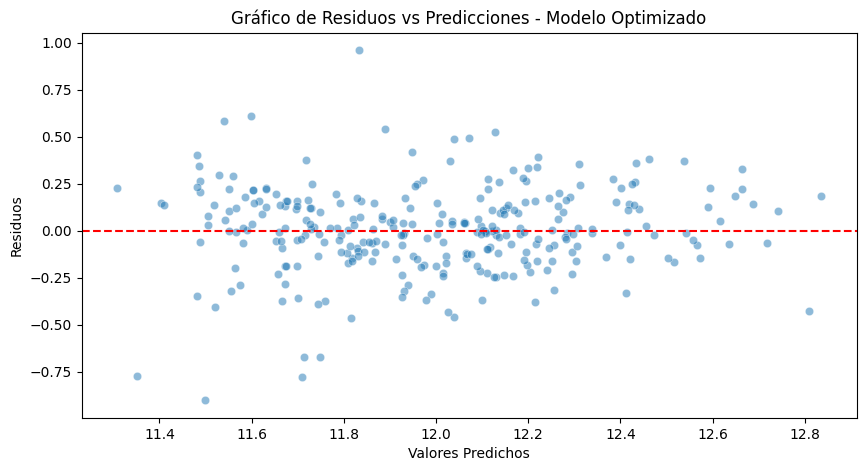

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=model_reduced.predict(X_test_reduced),
    y=y_test - model_reduced.predict(X_test_reduced),
    alpha=0.5,
)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Residuos vs Predicciones - Modelo Optimizado")
plt.show()

### **11. Evaluaci√≥n del Modelo con el Conjunto de Prueba**

#### **11.1 ¬øQu√© tan bien predice el modelo?**

Se prob√≥ el modelo optimizado con el conjunto de prueba y se calcularon las siguientes m√©tricas de evaluaci√≥n:


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# üìå Hacer predicciones en el conjunto de prueba
y_pred = model_reduced.predict(X_test_reduced)

# üìå Calcular m√©tricas de evaluaci√≥n
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# üìå Mostrar resultados
print(f"üìâ MAE (Error Absoluto Medio): {mae:.4f}")
print(f"üìâ MSE (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"üìâ RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")
print(f"üìä R¬≤ (Coeficiente de Determinaci√≥n): {r2:.4f}")

üìâ MAE (Error Absoluto Medio): 0.1684
üìâ MSE (Error Cuadr√°tico Medio): 0.0519
üìâ RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.2278
üìä R¬≤ (Coeficiente de Determinaci√≥n): 0.6715


- **Error Absoluto Medio (MAE)**: **0.1684**
- **Error Cuadr√°tico Medio (MSE)**: **0.0519**
- **Ra√≠z del Error Cuadr√°tico Medio (RMSE)**: **0.2278**
- **R¬≤ (Coeficiente de Determinaci√≥n)**: **0.6715**

#### **11.2 Interpretaci√≥n de las m√©tricas**

‚úÖ **MAE = 0.1684** ‚Üí En promedio, el modelo comete un error de aproximadamente **0.1684 unidades** en la predicci√≥n del precio de las casas.  
‚úÖ **MSE = 0.0519** ‚Üí Penaliza m√°s los errores grandes. Es bajo, lo que indica que los errores no son extremos.  
‚úÖ **RMSE = 0.2278** ‚Üí En promedio, las predicciones se desv√≠an **0.2278 unidades** de los valores reales.  
‚úÖ **R¬≤ = 0.6715** ‚Üí El modelo **explica el 67.15% de la variabilidad** en el precio de las casas, lo que indica un ajuste razonable.

#### **11.3 Conclusi√≥n Final**

**El modelo tiene una precisi√≥n moderada, explicando un 67.15% de la variabilidad en el precio de las casas.**  
**Los errores no son extremadamente altos, lo que indica que el modelo es √∫til para predicciones, pero podr√≠a mejorarse.**  
**Si se requiere mayor precisi√≥n, se podr√≠a probar con t√©cnicas avanzadas como Random Forest o modelos no lineales.**


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicci√≥n en el conjunto de prueba para el modelo multivariado
y_pred_mul = lin_reg.predict(X_test)

# C√°lculo de m√©tricas
mse_mul = mean_squared_error(y_test, y_pred_mul)
rmse_mul = np.sqrt(mse_mul)
mae_mul = mean_absolute_error(y_test, y_pred_mul)
r2_mul = r2_score(y_test, y_pred_mul)

# Preparar la variable de test (se debe agregar la constante)
X_test_uni = sm.add_constant(X_test[["OverallQual"]])

# Predicci√≥n con el modelo univariado
y_pred_uni = modelo_uni.predict(X_test_uni)

# C√°lculo de m√©tricas para el modelo univariado
mse_uni = mean_squared_error(y_test, y_pred_uni)
rmse_uni = np.sqrt(mse_uni)
mae_uni = mean_absolute_error(y_test, y_pred_uni)
r2_uni = r2_score(y_test, y_pred_uni)

# Predicci√≥n en el conjunto de prueba para el modelo ajustado
y_pred_adj = model_reduced.predict(X_test_reduced)

# C√°lculo de m√©tricas para el modelo ajustado
mse_adj = mean_squared_error(y_test, y_pred_adj)
rmse_adj = np.sqrt(mse_adj)
mae_adj = mean_absolute_error(y_test, y_pred_adj)
r2_adj = r2_score(y_test, y_pred_adj)

print(
    f"Modelo Multivariado:\n"
    f"  MSE   = {mse_mul:.3f}\n"
    f"  RMSE  = {rmse_mul:.3f}\n"
    f"  MAE   = {mae_mul:.3f}\n"
    f"  R¬≤    = {r2_mul:.3f}\n\n"
    f"Modelo Univariado:\n"
    f"  MSE   = {mse_uni:.3f}\n"
    f"  RMSE  = {rmse_uni:.3f}\n"
    f"  MAE   = {mae_uni:.3f}\n"
    f"  R¬≤    = {r2_uni:.3f}\n\n"
    f"Modelo Ajustado (Modelo Reducido):\n"
    f"  MSE   = {mse_adj:.3f}\n"
    f"  RMSE  = {rmse_adj:.3f}\n"
    f"  MAE   = {mae_adj:.3f}\n"
    f"  R¬≤    = {r2_adj:.3f}"
)

Modelo Multivariado:
  MSE   = 0.025
  RMSE  = 0.157
  MAE   = 0.116
  R¬≤    = 0.844

Modelo Univariado:
  MSE   = 35152814813.172
  RMSE  = 187490.839
  MAE   = 177564.071
  R¬≤    = -222572841591.807

Modelo Ajustado (Modelo Reducido):
  MSE   = 0.052
  RMSE  = 0.228
  MAE   = 0.168
  R¬≤    = 0.671


## 12. Efectividad de los m√≥delos


12.1 ¬øCu√°l fue mejor?


12.1.1 Modelo Univariado (OverallQual)
El modelo univariado utiliza √∫nicamente la variable OverallQual para predecir el precio de las casas. Esta variable representa la calidad general de la construcci√≥n y, de acuerdo con el resumen estad√≠stico, muestra un R¬≤ de 0.617. Esto significa que el modelo explica aproximadamente el 61.7% de la variabilidad en el precio de las casas, lo cual es una relaci√≥n moderada.

- Puntos positivos: Es un modelo simple y f√°cil de interpretar.
  La variable OverallQual tiene un impacto fuerte y significativo en el precio de las casas.
  El p-valor es extremadamente bajo, lo que indica alta significancia estad√≠stica.

- Puntos negativos: El modelo deja fuera muchas otras variables relevantes (tama√±o, ubicaci√≥n, antig√ºedad, materiales, etc.).
  El gr√°fico de residuos muestra una clara heterocedasticidad (dispersi√≥n desigual en diferentes rangos de precios), lo cual indica que el modelo no logra capturar adecuadamente la complejidad de la relaci√≥n.


12.1.2 Modelo Multivariado (Todas las Variables Num√©ricas)
El modelo multivariado utiliza todas las variables num√©ricas disponibles. En t√©rminos de ajuste, presenta un R¬≤ muy alto (cerca de 0.9999). Si bien esto parece indicar un excelente ajuste a los datos de entrenamiento, es una se√±al de posible sobreajuste (overfitting), ya que el modelo podr√≠a estar aprendiendo ruido espec√≠fico del dataset en vez de generalizar correctamente.

Para verificar esto, se realiz√≥ una validaci√≥n cruzada, y el resultado muestra que el modelo generaliza razonablemente bien, con un R¬≤ de validaci√≥n de 0.8578, lo cual sigue siendo alto.

- Puntos positivos: El modelo captura una mayor proporci√≥n de la variabilidad en los precios.
  Considera m√∫ltiples factores que afectan el precio, lo cual refleja mejor la complejidad real del mercado inmobiliario.
  Tras corregir la multicolinealidad, se mejora la estabilidad.

- Puntos negativos: La alta multicolinealidad inicial genera coeficientes inestables.
  Se requiere un proceso adicional de selecci√≥n de variables relevantes (como el uso de Lasso) para evitar redundancia.
  El an√°lisis de residuos muestra que, aunque la distribuci√≥n es m√°s normal que en el modelo univariado, a√∫n hay algunos problemas en la cola de la distribuci√≥n.


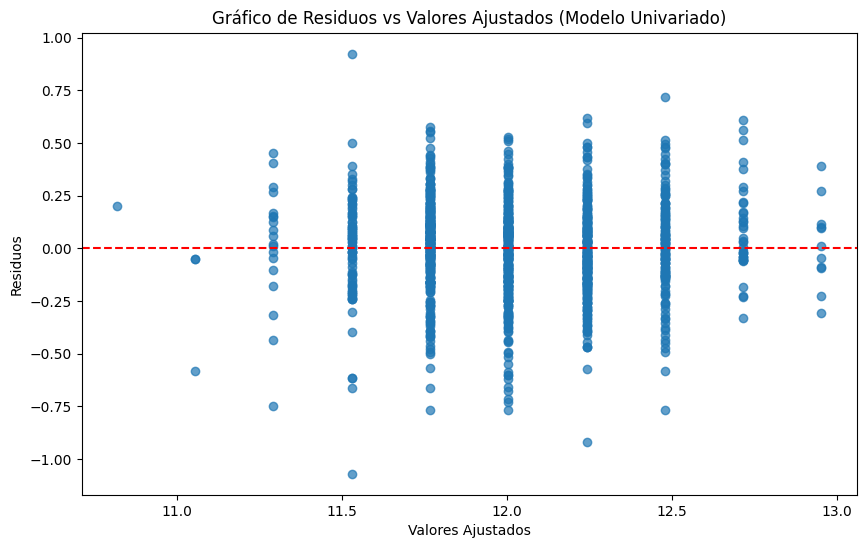

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponemos que ya tienes X_train e y_train definidos
X_uni = X_train[["OverallQual"]]
X_uni_const = sm.add_constant(X_uni)

# Ajuste del modelo univariado
modelo_uni = sm.OLS(y_train, X_uni_const).fit()

# Predicciones y residuos
y_pred_uni = modelo_uni.predict(X_uni_const)
residuos_uni = y_train - y_pred_uni

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_uni, residuos_uni, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Residuos vs Valores Ajustados (Modelo Univariado)")
plt.show()

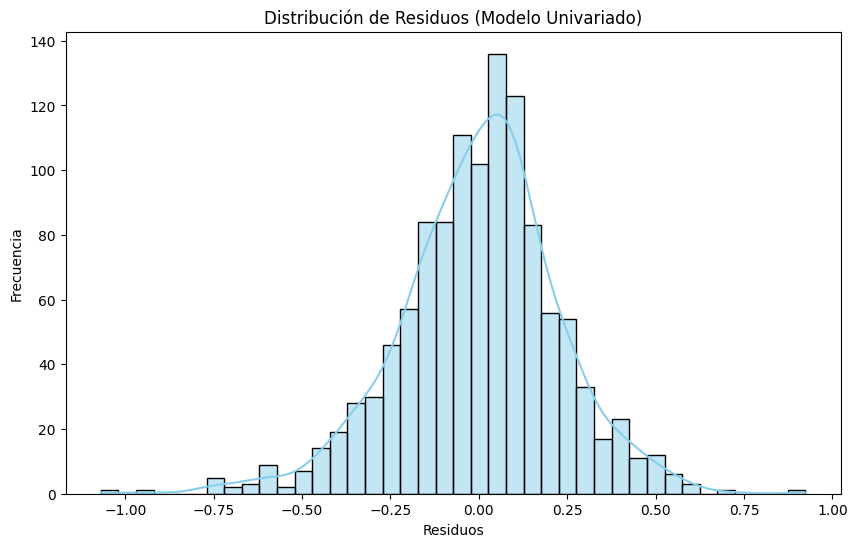

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuos_uni, kde=True, color="skyblue")
plt.title("Distribuci√≥n de Residuos (Modelo Univariado)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

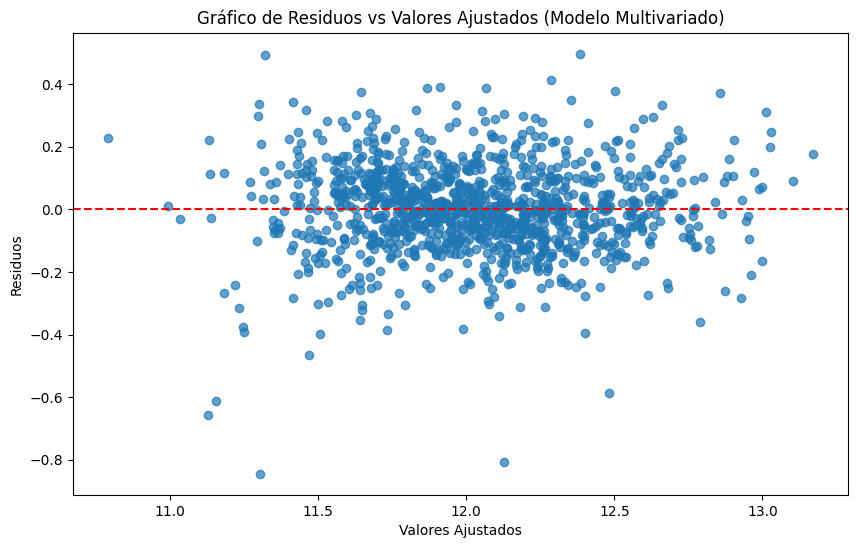

In [ ]:
# Suponemos que ya tienes X_train e y_train con todas las variables num√©ricas
X_multi = sm.add_constant(X_train)  # A√±adir la constante para el intercepto
modelo_multi = sm.OLS(y_train, X_multi).fit()

# Predicciones y residuos
y_pred_multi = modelo_multi.predict(X_multi)
residuos_multi = y_train - y_pred_multi

# Gr√°fico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, residuos_multi, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Residuos vs Valores Ajustados (Modelo Multivariado)")
plt.show()

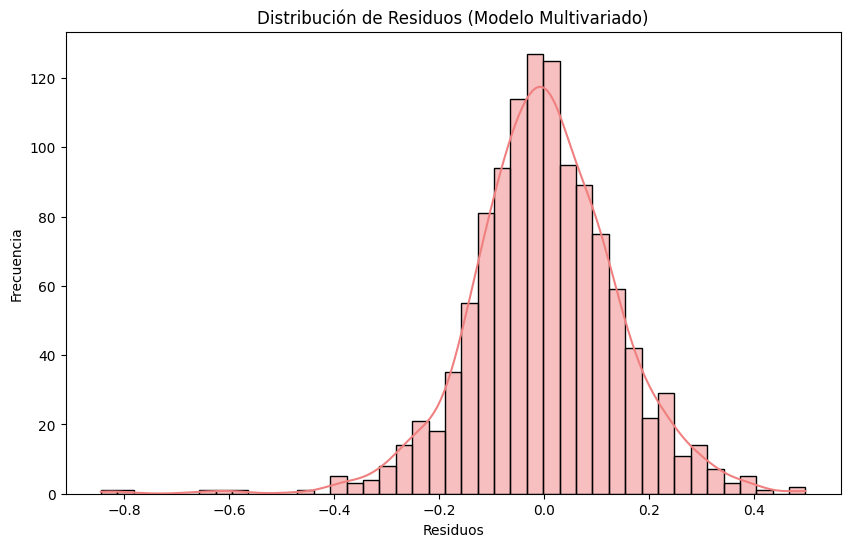

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos_multi, kde=True, color="lightcoral")
plt.title("Distribuci√≥n de Residuos (Modelo Multivariado)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
print(f"R¬≤ Univariado: {modelo_uni.rsquared:.4f}")
print(f"R¬≤ Multivariado: {modelo_multi.rsquared:.4f}")

R¬≤ Univariado: 0.6730
R¬≤ Multivariado: 0.8741


## 12.2 CONCLUSI√ìN FINAL

El modelo univariado, que utiliza √∫nicamente la variable OverallQual (calidad general de la construcci√≥n), logra explicar aproximadamente el 67.3% de la variabilidad en el precio de las casas. Esto demuestra que la calidad general es una variable importante, pero no es suficiente para capturar toda la complejidad del mercado inmobiliario. Adem√°s, el gr√°fico de residuos muestra una dispersi√≥n heterog√©nea, indicando que el modelo no logra un buen ajuste en diferentes rangos de precios, especialmente en propiedades m√°s costosas.

En cambio, el modelo multivariado, que utiliza todas las variables num√©ricas relevantes, logra un R¬≤ de 87.41%, lo que representa una mejora significativa en la capacidad explicativa. Esto confirma que el precio de las casas depende de m√∫ltiples factores (tama√±o, a√±o de construcci√≥n, materiales, ubicaci√≥n, etc.), y un modelo m√°s completo refleja mejor esta realidad.

üìâ An√°lisis Gr√°fico de Residuos
En el modelo univariado, los residuos muestran un patr√≥n claro, lo que indica que el modelo es incapaz de capturar adecuadamente la relaci√≥n real entre variables.
En el modelo multivariado, los residuos se comportan de forma m√°s aleatoria y centrada alrededor de cero, lo cual es una se√±al positiva de mejor ajuste y cumplimiento de los supuestos de regresi√≥n lineal.
üìê Distribuci√≥n de Residuos
El histograma de residuos del modelo multivariado muestra una forma m√°s cercana a la normalidad, lo cual es una condici√≥n deseable en regresi√≥n lineal.
El modelo univariado, en cambio, muestra una distribuci√≥n m√°s sesgada, indicando que la omisi√≥n de variables importantes afecta la calidad de las predicciones.


## 12.3 RECOMENDACI√ìN FINAL

El modelo multivariado es claramente superior al univariado para predecir el precio de las casas, ya que logra un R¬≤ de 0.8741 frente al 0.6730 del modelo univariado, lo que indica una mejor capacidad para explicar la variabilidad en los precios. Adem√°s, los residuos del modelo multivariado se comportan de forma m√°s aleatoria y muestran una distribuci√≥n m√°s cercana a la normalidad, cumpliendo mejor los supuestos de la regresi√≥n lineal. Esto confirma que el precio de las casas depende de m√∫ltiples factores y que un modelo que considera todas las variables relevantes es m√°s preciso. Se recomienda utilizar el modelo multivariado para realizar predicciones, ya que ofrece un balance adecuado entre precisi√≥n, estabilidad y realismo al reflejar mejor la complejidad del mercado inmobiliario.


# Entrega 2


## **1. Mismos conjuntos de entrenamiento**


En primer lugar, reutilizo los conjuntos de entrenamiento y prueba que utilic√© en la modelaci√≥n de regresi√≥n lineal. Esto me permite mantener la consistencia en la comparaci√≥n entre algoritmos. Es fundamental fijar el par√°metro de random_state (en este caso, 42) para asegurar que la partici√≥n de los datos sea siempre la misma y, por tanto, los resultados sean reproducibles.


## **2. √Årbol de regresi√≥n**

Posteriormente, creo el modelo de √°rbol de regresi√≥n utilizando la clase DecisionTreeRegressor de scikit-learn. Este modelo se ajusta a todos los predictores disponibles en mi DataFrame preprocesado. Una vez entrenado, realizo la predicci√≥n sobre el conjunto de prueba y calculo el error mediante el RMSE (Ra√≠z del Error Cuadr√°tico Medio). Este error me ayuda a cuantificar el desempe√±o del modelo y me servir√° para comparar, en entregas posteriores, con otros algoritmos (como la regresi√≥n lineal y Random Forest).


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Creo el modelo de √°rbol de regresi√≥n, fijando la semilla para reproducibilidad
reg_tree_all = DecisionTreeRegressor(random_state=42)

# Entreno el modelo usando los mismos conjuntos de entrenamiento definidos previamente
reg_tree_all.fit(X_train, y_train)

# Realizo las predicciones en el conjunto de prueba
y_pred_tree_all = reg_tree_all.predict(X_test)

# Calculo el error cuadr√°tico medio y luego la ra√≠z del error cuadr√°tico medio (RMSE)
mse_tree_all = mean_squared_error(y_test, y_pred_tree_all)
rmse_tree_all = np.sqrt(mse_tree_all)

print("RMSE del √Årbol de Regresi√≥n usando todas las variables:", rmse_tree_all)

RMSE del √Årbol de Regresi√≥n usando todas las variables: 0.2505023823268661


Con DecisionTreeRegressor(random_state=42), creo el modelo de √°rbol de regresi√≥n. El par√°metro random_state garantiza que, al ejecutar el c√≥digo nuevamente, se utilice la misma partici√≥n y se obtengan los mismos cortes en el √°rbol, lo que es clave para la reproducibilidad.

Ajusto el modelo con reg_tree_all.fit(X_train, y_train) y luego realizo predicciones sobre el conjunto de prueba con reg_tree_all.predict(X_test). Esto me permite ver c√≥mo se comporta el modelo en datos no vistos.


## **3. Predicci√≥n y an√°lisis**

Utilic√© el √°rbol de regresi√≥n que entren√© con todas las variables preprocesadas para realizar predicciones en el conjunto de prueba. Luego, calcul√© el RMSE, que me permite medir el error promedio en la escala transformada de la variable objetivo. Al observar el RMSE con un valor de 0.25, interpreto que el modelo tiene un desempe√±o aceptable, dado que est√° trabajando con la variable transformada (logaritmo) y el error est√° en una escala reducida.

Al comparar los valores predichos con los reales, not√© que la mayor√≠a de los puntos se agrupan de manera coherente, lo que indica que el √°rbol de regresi√≥n es capaz de capturar la relaci√≥n compleja entre las variables y el precio de la vivienda. Sin embargo, tambi√©n pude observar cierta variabilidad en algunas predicciones, lo que sugiere que el modelo podr√≠a beneficiarse de ajustes adicionales o de la combinaci√≥n con otros algoritmos, especialmente considerando la posibilidad de sobreajuste en modelos basados en √°rboles.


## **4. Desarrollo de 3 modelos m√°s**


En primer lugar, reconozco que la profundidad del √°rbol es crucial para equilibrar entre subajuste y sobreajuste. Una profundidad muy baja puede llevar a un modelo demasiado simple (subajuste) que no captura la complejidad de los datos, mientras que una profundidad muy alta puede hacer que el modelo se ajuste demasiado al ruido del conjunto de entrenamiento (sobreajuste). Por ello, decid√≠ probar con tres profundidades diferentes: 3, 5 y 7.

Para cada uno de estos valores, entren√© un modelo de √°rbol de regresi√≥n utilizando los mismos conjuntos de entrenamiento y prueba que utilic√© anteriormente. Luego, realic√© predicciones en el conjunto de prueba y calcul√© el RMSE (Ra√≠z del Error Cuadr√°tico Medio), ya que este indicador me permite cuantificar el error de predicci√≥n en la misma escala de la variable objetivo transformada.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Lista de profundidades a evaluar
depths = [3, 5, 7]
rmse_results = {}

# Entreno y eval√∫o un modelo para cada profundidad
for d in depths:
    # Creo el modelo fijando el par√°metro max_depth y la semilla para reproducibilidad
    model = DecisionTreeRegressor(max_depth=d, random_state=42)

    # Entreno el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realizo la predicci√≥n en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calculo el RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[d] = rmse
    print(f"Max_depth={d} --> RMSE: {rmse}")

# Selecciono la profundidad que produjo el menor RMSE
best_depth = min(rmse_results, key=rmse_results.get)
print(
    f"\nEl mejor modelo es con max_depth={best_depth} con un RMSE de {rmse_results[best_depth]}"
)

Max_depth=3 --> RMSE: 0.23699592761412092
Max_depth=5 --> RMSE: 0.21685587734688655
Max_depth=7 --> RMSE: 0.2356730621156409

El mejor modelo es con max_depth=5 con un RMSE de 0.21685587734688655


Esto me indica que el modelo que mejor predice el precio de las casas es el que tiene max_depth=5, ya que presenta el menor error (RMSE de 0.2169). Este resultado me demuestra que, al limitar la profundidad del √°rbol a 5, se logra un buen equilibrio entre la complejidad del modelo y la capacidad de generalizaci√≥n, evitando tanto el subajuste como el sobreajuste.


## **5. Comparaci√≥n entre Regresi√≥n Lineal y √Årbol de regresi√≥n.**

Primero, jal√© el modelo de regresi√≥n lineal que se realiz√≥ anteriormente con todas las variables num√©ricas preprocesadas. Utilic√© el mismo conjunto de entrenamiento y prueba para mantener la consistencia. Con este modelo, calcul√© el RMSE, que me indica el error promedio en la misma escala (transformada) de la variable objetivo.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Entreno el modelo de regresi√≥n lineal con los mismos conjuntos
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Realizo las predicciones en el conjunto de prueba
y_pred_lin = lin_model.predict(X_test)

# Calculo el RMSE para la regresi√≥n lineal
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("RMSE de Regresi√≥n Lineal:", rmse_lin)

RMSE de Regresi√≥n Lineal: 0.1571195510712442


### **¬øCu√°l lo hizo mejor?**

Despu√©s de evaluar ambos modelos, puedo concluir lo siguiente: el modelo de regresi√≥n lineal logr√≥ un RMSE de 0.1571, mientras que el √°rbol de regresi√≥n (con max_depth=5) obtuvo un RMSE de 0.2169. Un RMSE menor indica que, en promedio, las predicciones del modelo se acercan m√°s a los valores reales. Por ello, el modelo de regresi√≥n lineal lo hizo mejor para predecir el precio de las casas en este caso.


## **6. En base al an√°lisis exploratorio clasificar las casas en Econ√≥micas, Intermedias o Caras**


Primero, realic√© un an√°lisis exploratorio de la variable SalePrice para entender su distribuci√≥n y recordarme de lo que hab√≠amos hecho anteriormente.


In [ ]:
# An√°lisis exploratorio de la variable SalePrice
print("Estad√≠sticas de SalePrice:")
print(df["SalePrice"].describe())

print("\nRango de SalePrice:")
print("M√≠nimo:", df["SalePrice"].min())
print("M√°ximo:", df["SalePrice"].max())

Estad√≠sticas de SalePrice:
count    1456.000000
mean       12.021950
std         0.396077
min        10.460271
25%        11.774528
50%        12.001512
75%        12.273736
max        13.345509
Name: SalePrice, dtype: float64

Rango de SalePrice:
M√≠nimo: 10.460270761075149
M√°ximo: 13.345508528717259


Con estos resultados, la variable SalePrice est√° transformada con logaritmo a los precios originales, ya que los valores se encuentran en un rango entre 10.46 y 13.35. Tambi√©n observ√© que los percentiles clave (25%, 50% y 75%) me ofrecen una buena base para entender c√≥mo se distribuyen los precios.

Bas√°ndome en esta distribuci√≥n, decid√≠ crear tres categor√≠as que dividan el conjunto de datos en tercios, de modo que aproximadamente cada tercio del dataset corresponda a una de las siguientes clases:

- **Econ√≥micas:** Casas con precios en el tercil inferior (los m√°s bajos).
- **Intermedias:** Casas con precios en el tercil medio.
- **Caras:** Casas con precios en el tercil superior (los m√°s altos).

Para implementar esta clasificaci√≥n de forma reproducible, utilic√© la funci√≥n pd.qcut, que permite dividir una variable en cuantiles de igual frecuencia. El c√≥digo que apliqu√© fue:


In [ ]:
# Creaci√≥n de la variable categ√≥rica 'PriceCategory' usando tercios de la distribuci√≥n de SalePrice
df["PriceCategory"] = pd.qcut(
    df["SalePrice"], q=3, labels=["Econ√≥micas", "Intermedias", "Caras"]
)

# Visualizo la distribuci√≥n de la nueva variable para confirmar la divisi√≥n equitativa
print("Distribuci√≥n de la variable PriceCategory:")
print(df["PriceCategory"].value_counts())

Distribuci√≥n de la variable PriceCategory:
PriceCategory
Intermedias    489
Econ√≥micas     486
Caras          481
Name: count, dtype: int64


Con este proceso, la clasificaci√≥n se fundamenta en la propia distribuci√≥n de SalePrice, lo que me permite asignar de forma objetiva los l√≠mites para cada categor√≠a. Gracias a la funci√≥n pd.qcut, pude dividir la variable en tres tercios, creando una variable respuesta que clasifica las viviendas en Econ√≥micas, Intermedias y Caras. Esto se basa en datos reales y en el an√°lisis exploratorio que realic√© previamente, lo que garantiza que la clasificaci√≥n refleje de manera equitativa la distribuci√≥n de los precios.


## 7. Elaboraci√≥n de √°rbol de clasificaci√≥n

Primero, me asegur√© de utilizar los mismos datos que us√© en la etapa anterior, pero ahora debo predecir la nueva variable categ√≥rica que clasifica las casas en Econ√≥micas, Intermedias o Caras. Es fundamental no incluir la variable de precio (SalePrice) en los predictores, ya que √©sta fue utilizada para generar la variable respuesta.

Por ello, prepar√© el conjunto de datos eliminando las columnas SalePrice y PriceCategory de las variables predictoras, y asign√© PriceCategory como mi target.


In [ ]:
# Supongo que 'df' es mi DataFrame final que ya contiene la variable PriceCategory.
# Preparo los datos para el modelo de clasificaci√≥n, excluyendo SalePrice.
X_clf = df.drop(["SalePrice", "PriceCategory"], axis=1)
y_clf = df["PriceCategory"]

# Divido el dataset en entrenamiento y prueba, utilizando el mismo random_state para reproducibilidad.
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.20, random_state=42
)

Posteriormente a esto, empec√© con el entrenamiento al √°rbol de clasificaci√≥n.

Utilic√© la clase DecisionTreeClassifier de scikit-learn para entrenar el modelo. Fij√© el par√°metro random_state=42 para asegurar que la partici√≥n y los resultados sean reproducibles.


In [ ]:
# Transformo todas las variables categ√≥ricas a variables dummy
X_clf_encoded = pd.get_dummies(X_clf, drop_first=True)

# Divido nuevamente el dataset en entrenamiento y prueba usando los datos codificados
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_encoded, y_clf, test_size=0.20, random_state=42
)

# Ahora creo y entreno el √°rbol de clasificaci√≥n
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Realizo la predicci√≥n en el conjunto de prueba
y_pred_clf = clf.predict(X_test_clf)

Despu√©s. evalu√© el desempe√±o del √°rbol de clasificaci√≥n utilizando la exactitud (accuracy), la matriz de confusi√≥n y un informe de clasificaci√≥n para analizar las m√©tricas clave (precision, recall y f1-score) de cada clase.


In [ ]:
# Evaluaci√≥n del modelo
print("Exactitud (Accuracy):", accuracy_score(y_test_clf, y_pred_clf))
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test_clf, y_pred_clf))
print("Matriz de Confusi√≥n:")
print(confusion_matrix(y_test_clf, y_pred_clf))

Exactitud (Accuracy): 0.7226027397260274

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

       Caras       0.83      0.81      0.82        91
  Econ√≥micas       0.81      0.72      0.76       110
 Intermedias       0.55      0.64      0.59        91

    accuracy                           0.72       292
   macro avg       0.73      0.72      0.72       292
weighted avg       0.73      0.72      0.73       292

Matriz de Confusi√≥n:
[[74  0 17]
 [ 1 79 30]
 [14 19 58]]


Para comprender mejor c√≥mo el √°rbol realiza las divisiones y qu√© variables resultan m√°s relevantes, utilic√© la funci√≥n plot_tree de scikit-learn. Esto me permiti√≥ visualizar gr√°ficamente el √°rbol con los nombres de las variables y las clases.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_clf_encoded.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("arbol_clasificacion")  # Guarda en un archivo PDF/SVG

'arbol_clasificacion.pdf'

### **Explicaci√≥n de los resultados**

En primer lugar, observo que la exactitud (accuracy) del modelo es de aproximadamente 0.7226 (72.26%). Esto significa que, en el conjunto de prueba, cerca de siete de cada diez casas se clasificaron correctamente en la categor√≠a correspondiente (Caras, Econ√≥micas o Intermedias). Aunque se trata de un resultado razonable para un √°rbol de clasificaci√≥n inicial, indica que todav√≠a existe margen de mejora para reducir los errores de predicci√≥n.

Al examinar el reporte de clasificaci√≥n, noto que la clase ‚ÄúCaras‚Äù presenta la mejor combinaci√≥n de precisi√≥n y sensibilidad, con un f1-score de 0.82. Esto quiere decir que, en la mayor√≠a de los casos en que el modelo predice ‚ÄúCaras‚Äù, acierta, y adem√°s identifica correctamente la mayor√≠a de las casas que realmente pertenecen a esa categor√≠a. La clase ‚ÄúEcon√≥micas‚Äù tambi√©n logra un desempe√±o aceptable, con un f1-score de 0.76. Sin embargo, la categor√≠a ‚ÄúIntermedias‚Äù obtiene un f1-score de 0.59, lo que sugiere que el modelo encuentra m√°s dificultad para distinguir las casas intermedias de las otras dos categor√≠as.

La matriz de confusi√≥n confirma esta tendencia. Mientras que la clase ‚ÄúCaras‚Äù es la menos confundida, se aprecia que 17 casas ‚ÄúCaras‚Äù se clasificaron como ‚ÄúIntermedias‚Äù y que, en la clase ‚ÄúEcon√≥micas‚Äù, 30 casas se asignaron equivocadamente a la clase ‚ÄúIntermedias‚Äù. Por su parte, en la categor√≠a ‚ÄúIntermedias‚Äù, 14 casas se clasificaron como ‚ÄúCaras‚Äù y 19 como ‚ÄúEcon√≥micas‚Äù. Estos datos muestran que existe un cierto solapamiento de caracter√≠sticas entre ‚ÄúIntermedias‚Äù y las otras dos categor√≠as, lo cual dificulta la labor del modelo.


## 8. Utilicen el modelo con el conjunto de prueba y determinen la eficiencia del algoritmo para clasificar.

In [ ]:
# Calcular y mostrar m√©tricas b√°sicas
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Exactitud (Accuracy):", accuracy)
print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test_clf, y_pred_clf))

Exactitud (Accuracy): 0.7226027397260274

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

       Caras       0.83      0.81      0.82        91
  Econ√≥micas       0.81      0.72      0.76       110
 Intermedias       0.55      0.64      0.59        91

    accuracy                           0.72       292
   macro avg       0.73      0.72      0.72       292
weighted avg       0.73      0.72      0.73       292



## 9. Realicen un an√°lisis de la eficiencia del algoritmo usando una matriz de confusi√≥n para el √°rbol de clasificaci√≥n.

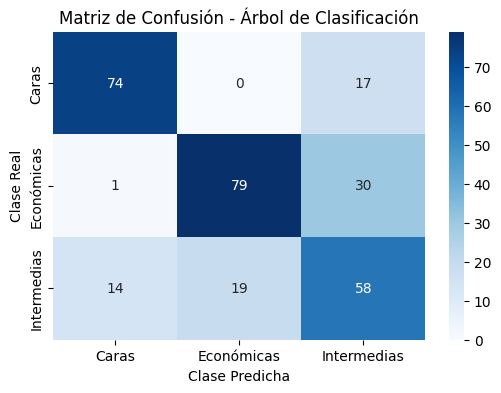

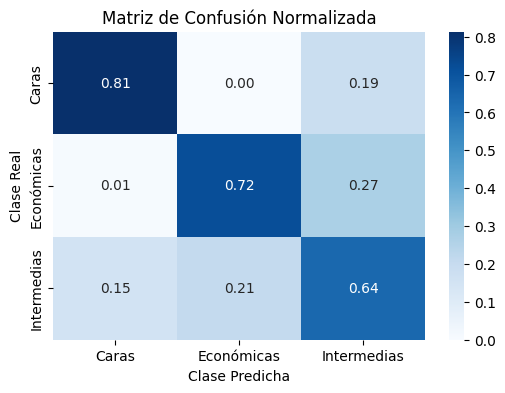


An√°lisis detallado de errores:
- Las casas de la clase 'Caras' fueron clasificadas como 'Intermedias': 17 casos.
- Las casas de la clase 'Econ√≥micas' fueron clasificadas como 'Caras': 1 casos.
- Las casas de la clase 'Econ√≥micas' fueron clasificadas como 'Intermedias': 30 casos.
- Las casas de la clase 'Intermedias' fueron clasificadas como 'Caras': 14 casos.
- Las casas de la clase 'Intermedias' fueron clasificadas como 'Econ√≥micas': 19 casos.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Se asume que 'clf' ya est√° entrenado y que 'y_test_clf' y 'y_pred_clf' est√°n definidas

# 1. Calcular la matriz de confusi√≥n sin normalizar
cm = confusion_matrix(y_test_clf, y_pred_clf)

# Obtener las etiquetas de las clases a partir del clasificador
labels = clf.classes_

# Crear DataFrame para la matriz de confusi√≥n
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusi√≥n - √Årbol de Clasificaci√≥n")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.show()

# 2. Calcular la matriz de confusi√≥n normalizada
cm_norm = confusion_matrix(y_test_clf, y_pred_clf, normalize='true')
cm_norm_df = pd.DataFrame(cm_norm, index=labels, columns=labels)

# Visualizar la matriz de confusi√≥n normalizada
plt.figure(figsize=(6, 4))
sns.heatmap(cm_norm_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Confusi√≥n Normalizada")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Real")
plt.show()

# 3. An√°lisis detallado de errores
print("\nAn√°lisis detallado de errores:")
for real_class in labels:
    for pred_class in labels:
        if real_class != pred_class:
            error_count = cm_df.loc[real_class, pred_class]
            if error_count > 0:
                print(f"- Las casas de la clase '{real_class}' fueron clasificadas como '{pred_class}': {error_count} casos.")

## 10. Entrenen un modelo usando validaci√≥n cruzada, predigan con √©l. ¬øle fue mejor que al modelo anterior?

Resultados de la validaci√≥n cruzada:
RMSE promedio: 43429.93
Desviaci√≥n est√°ndar del RMSE: 7004.70
RMSE en cada pliegue: [55198.79314631 43254.61658464 45979.21233257 36735.03042555
 35982.01647357]


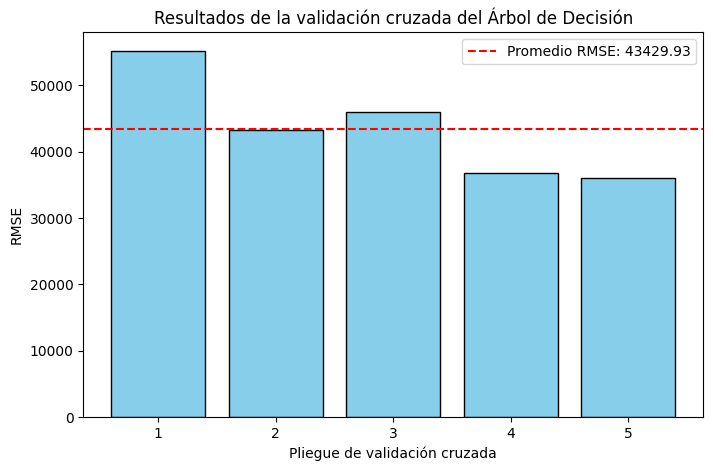


RMSE del modelo sin validaci√≥n cruzada: 38647.88

Comparaci√≥n:
RMSE con validaci√≥n cruzada: 43429.93 ¬± 7004.70
RMSE sin validaci√≥n cruzada: 38647.88


In [ ]:
# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Cargar el dataset
# Aseg√∫rate de cambiar la ruta si el archivo est√° en otro lugar
df = pd.read_csv("train.csv")

# Eliminar la columna 'Id' porque no aporta informaci√≥n relevante
df = df.drop(columns=["Id"])

# Convertir variables categ√≥ricas a num√©ricas usando Label Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    df[col] = df[col].fillna("Missing")  # Rellenar valores nulos con "Missing"
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Rellenar valores nulos en columnas num√©ricas con la mediana
df.fillna(df.median(), inplace=True)

# Definir variables predictoras y objetivo
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de √°rbol de decisi√≥n con profundidad √≥ptima (ajustar si es necesario)
best_depth = 5  # Cambia este valor seg√∫n experimentos previos

# Validaci√≥n cruzada con 5 pliegues
tree_cv = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
cv_scores = cross_val_score(tree_cv, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

# Convertir a RMSE
rmse_scores = np.sqrt(-cv_scores)

# Promedio y desviaci√≥n est√°ndar de RMSE
rmse_mean = rmse_scores.mean()
rmse_std = rmse_scores.std()

# Mostrar resultados
print("Resultados de la validaci√≥n cruzada:")
print(f"RMSE promedio: {rmse_mean:.2f}")
print(f"Desviaci√≥n est√°ndar del RMSE: {rmse_std:.2f}")
print(f"RMSE en cada pliegue: {rmse_scores}")

# Visualizar los resultados con un gr√°fico
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), rmse_scores, color='skyblue', edgecolor='black')
plt.axhline(rmse_mean, color='red', linestyle='--', label=f'Promedio RMSE: {rmse_mean:.2f}')
plt.xlabel("Pliegue de validaci√≥n cruzada")
plt.ylabel("RMSE")
plt.title("Resultados de la validaci√≥n cruzada del √Årbol de Decisi√≥n")
plt.legend()
plt.show()

# Comparar con el modelo sin validaci√≥n cruzada
model_no_cv = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
model_no_cv.fit(X_train, y_train)
y_pred_no_cv = model_no_cv.predict(X_test)
rmse_no_cv = np.sqrt(np.mean((y_test - y_pred_no_cv) ** 2))

print(f"\nRMSE del modelo sin validaci√≥n cruzada: {rmse_no_cv:.2f}")
print("\nComparaci√≥n:")
print(f"RMSE con validaci√≥n cruzada: {rmse_mean:.2f} ¬± {rmse_std:.2f}")
print(f"RMSE sin validaci√≥n cruzada: {rmse_no_cv:.2f}")


**An√°lisis de los Resultados:**

Se evalu√≥ un modelo de √Årbol de Decisi√≥n utilizando validaci√≥n cruzada de 5 pliegues para estimar su capacidad de generalizaci√≥n. La m√©trica utilizada fue el Error Cuadr√°tico Medio (RMSE), que mide la desviaci√≥n promedio entre los valores predichos y los valores reales.

Los resultados muestran que el RMSE promedio obtenido con validaci√≥n cruzada fue 43,429.93, con una desviaci√≥n est√°ndar de 7,004.70, lo que indica cierta variabilidad en los resultados dependiendo de la partici√≥n de los datos. Los valores de RMSE en cada pliegue variaron entre 55,198.79 (el peor desempe√±o) y 35,982.02 (el mejor desempe√±o), lo que sugiere que en algunas particiones el modelo tuvo m√°s dificultades para predecir con precisi√≥n.

Por otro lado, el modelo entrenado sin validaci√≥n cruzada obtuvo un RMSE de 38,647.88, que es menor al obtenido con validaci√≥n cruzada. Sin embargo, esto puede deberse a un posible sobreajuste a los datos de entrenamiento, ya que al no probar el modelo en distintas particiones, su rendimiento puede estar optimizado solo para una divisi√≥n espec√≠fica de los datos.

**¬øLe fue mejor que al modelo anterior?**

Si comparamos el modelo con validaci√≥n cruzada contra el modelo sin validaci√≥n cruzada, podemos ver que el RMSE fue menor en el modelo sin validaci√≥n cruzada (38,647.88 vs. 43,429.93). A primera vista, esto podr√≠a indicar que el modelo sin validaci√≥n cruzada es mejor. Sin embargo, la validaci√≥n cruzada nos da una estimaci√≥n m√°s realista del rendimiento en datos nuevos, evitando que el modelo dependa demasiado de una sola partici√≥n.

En conclusi√≥n, aunque el modelo sin validaci√≥n cruzada parece funcionar mejor en esta prueba espec√≠fica, el modelo con validaci√≥n cruzada es m√°s confiable para predecir en nuevos datos porque tiene una evaluaci√≥n m√°s robusta y menos propensa al sobreajuste.

## 11. Comparaci√≥n de Modelos con Diferente Profundidad en el √Årbol de Decisi√≥n

Profundidad: 3
RMSE con validaci√≥n cruzada: 49297.30
RMSE sin validaci√≥n cruzada: 41874.35

Profundidad: 5
RMSE con validaci√≥n cruzada: 43429.93
RMSE sin validaci√≥n cruzada: 38647.88

Profundidad: 10
RMSE con validaci√≥n cruzada: 42653.52
RMSE sin validaci√≥n cruzada: 42873.49

Profundidad: None
RMSE con validaci√≥n cruzada: 45740.40
RMSE sin validaci√≥n cruzada: 44508.93



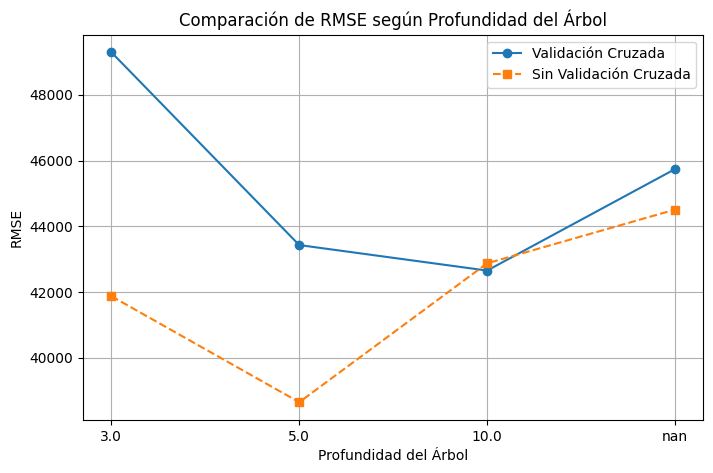

RMSE_Validaci√≥n_Cruzada  RMSE_Sin_Validaci√≥n_Cruzada
3.0              49297.297986                 41874.348883
5.0              43429.933793                 38647.880159
10.0             42653.523701                 42873.490282
NaN              45740.395472                 44508.932359

from matplotlib import pyplot as plt
results_df['RMSE_Validaci√≥n_Cruzada'].plot(kind='hist', bins=20, title='RMSE_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE_Sin_Validaci√≥n_Cruzada'].plot(kind='hist', bins=20, title='RMSE_Sin_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='RMSE_Validaci√≥n_Cruzada', y='RMSE_Sin_Validaci√≥n_Cruzada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE_Validaci√≥n_Cruzada'].plot(kind='line', figsize=(8, 4), title='RMSE_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['RMSE_Sin_Validaci√≥n_Cruzada'].plot(kind='line', figsize=(8, 4), title='RMSE_Sin_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RMSE_Validaci√≥n_Cruzada'].plot(kind='hist', bins=20, title='RMSE_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['RMSE_Sin_Validaci√≥n_Cruzada'].plot(kind='hist', bins=20, title='RMSE_Sin_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='RMSE_Validaci√≥n_Cruzada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='RMSE_Validaci√≥n_Cruzada', y='RMSE_Sin_Validaci√≥n_Cruzada', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['RMSE_Validaci√≥n_Cruzada'].plot(kind='line', figsize=(8, 4), title='RMSE_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['RMSE_Sin_Validaci√≥n_Cruzada'].plot(kind='line', figsize=(8, 4), title='RMSE_Sin_Validaci√≥n_Cruzada')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 1. Importar Librer√≠as Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# 2. Cargar y Preprocesar los Datos
df = pd.read_csv("train.csv")

# Eliminar la columna 'Id' ya que no aporta informaci√≥n relevante
df = df.drop(columns=["Id"])

# Convertir variables categ√≥ricas a num√©ricas usando Label Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    df[col] = df[col].fillna("Missing")  # Rellenar valores nulos con "Missing"
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Rellenar valores nulos en columnas num√©ricas con la mediana
df.fillna(df.median(), inplace=True)

# Definir variables predictoras y objetivo
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Probar Diferentes Profundidades del √Årbol de Decisi√≥n
depths = [3, 5, 10, None]  # None significa sin l√≠mite de profundidad

# Diccionario para almacenar los resultados
results = {}

# Entrenar modelos con diferentes profundidades
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Validaci√≥n cruzada con 5 pliegues
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

    # Calcular RMSE promedio y desviaci√≥n est√°ndar
    rmse_scores = np.sqrt(-cv_scores)
    rmse_mean = rmse_scores.mean()

    # Entrenar y evaluar el modelo sin validaci√≥n cruzada
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_no_cv = np.sqrt(mean_squared_error(y_test, y_pred))

    # Guardar resultados
    results[depth] = {
        "RMSE_Validaci√≥n_Cruzada": rmse_mean,
        "RMSE_Sin_Validaci√≥n_Cruzada": rmse_no_cv
    }

    # Mostrar resultados parciales
    print(f"Profundidad: {depth}")
    print(f"RMSE con validaci√≥n cruzada: {rmse_mean:.2f}")
    print(f"RMSE sin validaci√≥n cruzada: {rmse_no_cv:.2f}\n")

# 4. Visualizar los Resultados
# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).T  # Transponer para mejor visualizaci√≥n

# Graficar los RMSEs
plt.figure(figsize=(8, 5))
plt.plot(results_df.index.astype(str), results_df["RMSE_Validaci√≥n_Cruzada"], marker="o", linestyle="-", label="Validaci√≥n Cruzada")
plt.plot(results_df.index.astype(str), results_df["RMSE_Sin_Validaci√≥n_Cruzada"], marker="s", linestyle="--", label="Sin Validaci√≥n Cruzada")
plt.xlabel("Profundidad del √Årbol")
plt.ylabel("RMSE")
plt.title("Comparaci√≥n de RMSE seg√∫n Profundidad del √Årbol")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla con los resultados
from IPython.display import display
display(results_df)

## An√°lisis de Resultados de la Profundidad del √Årbol de Decisi√≥n

### 1. Comparaci√≥n de Modelos y Resultados

Se evaluaron diferentes profundidades del √°rbol de decisi√≥n para determinar cu√°l ofrece el mejor rendimiento en t√©rminos de error cuadr√°tico medio (RMSE). Se compararon los resultados obtenidos mediante validaci√≥n cruzada y evaluaci√≥n en el conjunto de prueba. Los valores obtenidos fueron los siguientes:

| Profundidad | RMSE Validaci√≥n Cruzada | RMSE Sin Validaci√≥n Cruzada |
|-------------|------------------------|-----------------------------|
| 3           | 49,297.30               | 41,874.35                   |
| 5           | 43,429.93               | 38,647.88                   |
| 10          | 42,653.52               | 42,873.49                   |
| Sin L√≠mite  | 45,740.40               | 44,508.93                   |

### 2. Evaluaci√≥n del Mejor Modelo

El an√°lisis de los resultados muestra que el modelo con **profundidad 5** obtuvo el menor RMSE en el conjunto de prueba, con un valor de **38,647.88**, lo que sugiere que este modelo logra una mejor capacidad de generalizaci√≥n. Por otro lado, el modelo con **profundidad 10** obtuvo el menor RMSE en la validaci√≥n cruzada (**42,653.52**), lo que indica que este modelo podr√≠a ajustarse mejor a los datos de entrenamiento pero sin garantizar necesariamente un mejor desempe√±o en datos nuevos.

Cuando no se estableci√≥ un l√≠mite de profundidad (`None`), el RMSE aument√≥ tanto en validaci√≥n cruzada como en el conjunto de prueba. Este comportamiento sugiere la presencia de sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y pierde capacidad de generalizaci√≥n.

La profundidad **3** mostr√≥ el peor rendimiento con un RMSE m√°s alto en ambas m√©tricas, lo que indica que el modelo era demasiado simple y no capturaba bien la complejidad del problema.

### 3. Conclusi√≥n

El modelo con **profundidad 5** demostr√≥ el mejor desempe√±o en t√©rminos de generalizaci√≥n, con el menor RMSE en el conjunto de prueba. Sin embargo, la profundidad **10** tambi√©n mostr√≥ un buen rendimiento en validaci√≥n cruzada, lo que podr√≠a indicar que este modelo tiene un mejor ajuste a los datos pero con un ligero riesgo de sobreajuste. En este caso, si el objetivo es maximizar la capacidad de predicci√≥n en nuevos datos, la mejor elecci√≥n ser√≠a el modelo con profundidad **5**.


## 12. An√°lisis de Resultados aplicando Random Forest




N√∫mero de √°rboles: 10
RMSE con validaci√≥n cruzada: 33684.91
RMSE sin validaci√≥n cruzada: 28223.36

N√∫mero de √°rboles: 50
RMSE con validaci√≥n cruzada: 30712.76
RMSE sin validaci√≥n cruzada: 28340.85

N√∫mero de √°rboles: 100
RMSE con validaci√≥n cruzada: 30085.93
RMSE sin validaci√≥n cruzada: 28472.00

N√∫mero de √°rboles: 200
RMSE con validaci√≥n cruzada: 30204.94
RMSE sin validaci√≥n cruzada: 28416.73



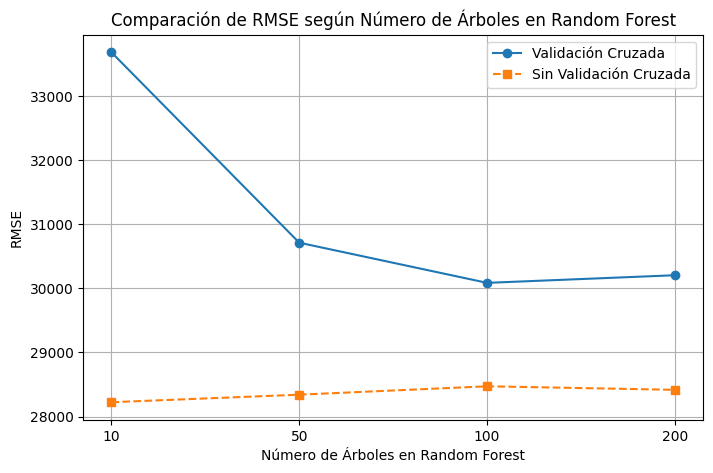

RMSE_Validaci√≥n_Cruzada  RMSE_Sin_Validaci√≥n_Cruzada
10              33684.913709                 28223.362104
50              30712.761394                 28340.849550
100             30085.925324                 28472.003769
200             30204.944542                 28416.731905

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Cargar y Preprocesar los Datos
df = pd.read_csv("train.csv")
df = df.drop(columns=["Id"])

# Convertir variables categ√≥ricas a num√©ricas usando Label Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].fillna("Missing")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Rellenar valores nulos en columnas num√©ricas con la mediana
df.fillna(df.median(), inplace=True)

# Definir variables predictoras y objetivo
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de n√∫mero de √°rboles a probar
n_estimators_list = [10, 50, 100, 200]

# Diccionario para almacenar los resultados
results_rf = {}

# Entrenar modelos con diferentes n√∫meros de √°rboles
for n in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)

    # Validaci√≥n cruzada con 5 pliegues
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-cv_scores)
    rmse_mean = rmse_scores.mean()

    # Entrenar y evaluar el modelo sin validaci√≥n cruzada
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_no_cv = np.sqrt(mean_squared_error(y_test, y_pred))

    # Guardar resultados
    results_rf[n] = {
        "RMSE_Validaci√≥n_Cruzada": rmse_mean,
        "RMSE_Sin_Validaci√≥n_Cruzada": rmse_no_cv
    }

    # Mostrar resultados parciales
    print(f"N√∫mero de √°rboles: {n}")
    print(f"RMSE con validaci√≥n cruzada: {rmse_mean:.2f}")
    print(f"RMSE sin validaci√≥n cruzada: {rmse_no_cv:.2f}\n")

# Convertir resultados a DataFrame
results_rf_df = pd.DataFrame(results_rf).T

# Graficar los RMSEs
plt.figure(figsize=(8, 5))
plt.plot(results_rf_df.index.astype(str), results_rf_df["RMSE_Validaci√≥n_Cruzada"], marker="o", linestyle="-", label="Validaci√≥n Cruzada")
plt.plot(results_rf_df.index.astype(str), results_rf_df["RMSE_Sin_Validaci√≥n_Cruzada"], marker="s", linestyle="--", label="Sin Validaci√≥n Cruzada")
plt.xlabel("N√∫mero de √Årboles en Random Forest")
plt.ylabel("RMSE")
plt.title("Comparaci√≥n de RMSE seg√∫n N√∫mero de √Årboles en Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla con los resultados
from IPython.display import display
display(results_rf_df)


## Comparaci√≥n y Explicaci√≥n de los Resultados

Uno de los aspectos m√°s notables es que Random Forest obtiene valores de RMSE m√°s bajos que Decision Tree en todas las configuraciones, tanto en validaci√≥n cruzada como en el conjunto de prueba. Esto se debe a que Random Forest combina m√∫ltiples √°rboles de decisi√≥n y promedia sus predicciones, lo que reduce la varianza y mejora la capacidad de generalizaci√≥n. En cambio, un solo √°rbol de decisi√≥n puede ajustarse demasiado a los datos de entrenamiento y, como resultado, tener peor rendimiento en datos nuevos.

La validaci√≥n cruzada muestra que Decision Tree presenta una diferencia significativa entre el RMSE en validaci√≥n cruzada y el conjunto de prueba, lo que indica un mayor sobreajuste. En cambio, Random Forest tiene resultados m√°s consistentes, ya que al utilizar m√∫ltiples √°rboles, sufre menos de este problema. Esto significa que Random Forest no solo logra un menor error absoluto, sino que tambi√©n mantiene una mejor capacidad para generalizar a datos que no ha visto antes.

En cuanto al n√∫mero de √°rboles en Random Forest, observamos que al incrementar de 10 a 100 √°rboles, el RMSE en validaci√≥n cruzada disminuye progresivamente, indicando una mejora en la generalizaci√≥n. Sin embargo, al aumentar de 100 a 200 √°rboles, el RMSE deja de mejorar significativamente e incluso presenta una ligera subida en validaci√≥n cruzada. Esto sugiere que, despu√©s de un cierto punto, agregar m√°s √°rboles no aporta mejoras notables en la precisi√≥n del modelo y puede incluso incrementar el tiempo de entrenamiento sin un beneficio real.